In [ ]:
# Clone the repository
!git clone https://github.com/hiive/mlrose.git
%cd mlrose

# Fetch all pull requests
!git fetch origin pull/22/head:fix-joblib-issue

# Checkout the specific pull request
!git checkout fix-joblib-issue

# Install the package from the local clone with the applied fix
!pip install .

# Return to the original directory if needed
%cd ..


Cloning into 'mlrose'...
remote: Enumerating objects: 2606, done.
remote: Counting objects: 100% (396/396), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 2606 (delta 252), reused 343 (delta 229), pack-reused 2210
Receiving objects: 100% (2606/2606), 1.97 MiB | 13.34 MiB/s, done.
Resolving deltas: 100% (1828/1828), done.
/content/mlrose
From https://github.com/hiive/mlrose
 * [new ref]         refs/pull/22/head -> fix-joblib-issue
Switched to branch 'fix-joblib-issue'
Processing /content/mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=102985 sha256=4511f8f895acad44d8430e32e8ea65f9a82d09ba2e9b7a4ff893f1dbe54765f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-3vdf00s_/wheels/50/ac/56/a248001dcf63344fbef992039dec2613cb4a7c56222c6f9a92
Successfully built mlrose-hiive
/content


In [ ]:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import random_hill_climb, simulated_annealing, genetic_alg, mimic, FourPeaks, TravellingSales, Queens
from mlrose_hiive import ExpDecay, GeomDecay, ArithDecay, DiscreteOpt, SARunner, GARunner, RHCRunner, MIMICRunner, NNGSRunner
#from mlrose_hiive.fitness import FourPeaks, QueensGenerator
import time
import random

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [ ]:
np.random.seed(80)
random.seed(9)
iterations = 1200

In [ ]:
#import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the 8-Queens problem
fitness_queens = mlrose_hiive.Queens()

In [ ]:
# Define alternative N-Queens custom fitness function for maximization problem
def queens_max(state):
  # Initialize counter
  fitness_cnt = 0

  # For all pairs of queens
  for i in range(len(state) - 1):
    for j in range(i + 1, len(state)):
      # Check for horizontal, diagonal-up and diagonal-down attacks
      if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
        # If no attacks, then increment counter
        fitness_cnt += 1

  return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)

### Solving the 8-Queens Problem Using the Randomized Hill Climbing algorithm

In [ ]:
problem_queens = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness_queens, maximize=True, max_val=8)

[0 0 0 0 0 0 0 0]


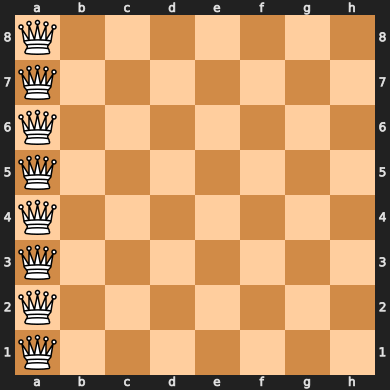

In [ ]:
state = problem_queens.get_state()
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

Best State: [6, 7, 6, 5, 4, 3, 2, 1]
Best Fitness: 23.0


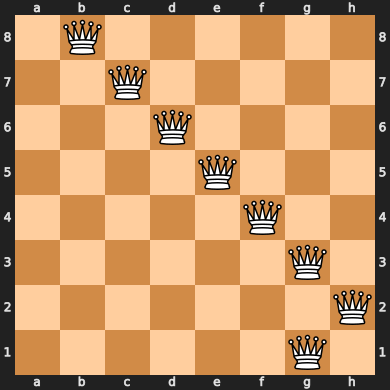

In [ ]:
import pandas as pd
from ast import literal_eval

# Create a runner class and solve the problem
rhc = RHCRunner(problem=problem_queens,
                experiment_name='queens8_rhc',
                output_directory=None,  # Note: specify an output directory to have results saved to disk
                seed=2,
                iteration_list=2 ** np.arange(11),
                max_attempts=200,
                restart_list=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                population_sizes=[15, 30, 60],
                mutation_rates=[0.2, 0.4, 0.6])

# Run the algorithm
rhc_df_run_stats, rhc_df_run_curves = rhc.run()

# Get the best state and fitness
best_state_rhc = rhc_df_run_stats['State'].iloc[-1]
best_fitness_rhc = rhc_df_run_stats['Fitness'].iloc[-1]

# Display the final state
print("Best State:", best_state_rhc)
print("Best Fitness:", best_fitness_rhc)

# Convert the state to a chess board layout and display it
state = literal_eval(best_state_rhc)
board_rhc = chess.Board()

# Clear the board
board_rhc.clear_board()

# Place the white queens on the board
for col, row in enumerate(state):
    board_rhc.set_piece_at(chess.square(row, col), chess.Piece(chess.QUEEN, chess.WHITE))

# Display the chessboard
display(board_rhc)


In [ ]:
problem_queens = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness_queens, maximize=True, max_val=8)

[0 0 0 0 0 0 0 0]


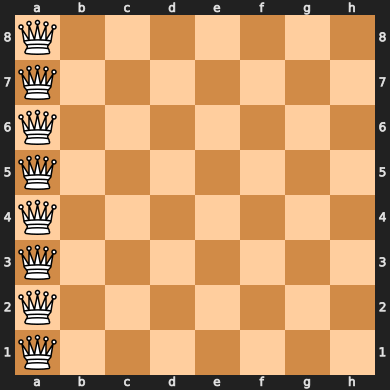

In [ ]:
state = problem_queens.get_state()
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

Best State: [0, 1, 2, 3, 4, 5, 6, 7]
Best Fitness: 28.0
[0, 1, 2, 3, 4, 5, 6, 7]


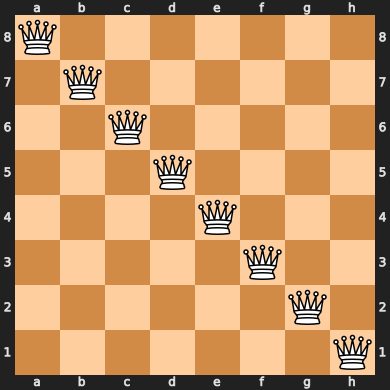

In [ ]:
import pandas as pd

# Create a runner class and solve the problem
rhc = RHCRunner(problem=problem_queens,
                experiment_name='queens8_rhc',
                output_directory=None,  # Note: specify an output directory to have results saved to disk
                seed=2,
                iteration_list=2 ** np.arange(11),
                max_attempts=150,
                restart_list=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                population_sizes=[15, 30, 60],
                mutation_rates=[0.1, 0.2, 0.5])

# Run the algorithm
rhc_df_run_stats, rhc_df_run_curves = rhc.run()

# Get the best state and fitness
best_state_rhc = rhc_df_run_stats['State'].iloc[-1]
best_fitness_rhc = rhc_df_run_stats['Fitness'].iloc[-1]

# Display the final state
print("Best State:", best_state_rhc)
print("Best Fitness:", best_fitness_rhc)


# Convert the state to a chess board layout and display it
state = literal_eval(best_state_rhc)
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board


# # Convert the state to a chess board layout and display it
# state = literal_eval(best_state_rhc)
# board_layout_rhc = '/'.join([''.join(['Q' if col == row else '.' for col in range(len(state))]) for row in state])
# board_rhc = chess.Board(board_layout_rhc)
# display(board_rhc)

In [ ]:
# Initialize the optimization problem
problem_queens = DiscreteOpt(length=8, fitness_fn=fitness_queens, maximize=True, max_val=8)

In [ ]:
# create a runner class and solve the problemn using Simulated Annealing
rhc = RHCRunner(problem=problem_queens,
              experiment_name='queens8_rhc',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=2560,
              iteration_list=2 ** np.arange(11),
              max_attempts=200,
              restart_list=[0,2,4,6,8,10,12,14,16,18,20])

# the two data frames will contain the results
rhc_df_run_stats, rhc_df_run_curves = rhc.run()

In [ ]:
rhc_df_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']]
HTML(rhc_df_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:12].to_html())

In [ ]:
best_rhc_fitness = rhc_df_run_curves['Fitness'].max()
best_rhc_runs = rhc_df_run_curves[rhc_df_run_curves['Fitness'] == best_rhc_fitness]
best_rhc_runs

Iteration      Time  Fitness  FEvals  Restarts  max_iters  \
2144         116  0.053998     28.0  1018.0         4       1024   
2145         117  0.054292     28.0  1019.0         4       1024   
2146         118  0.054573     28.0  1020.0         4       1024   
2147         119  0.054833     28.0  1021.0         4       1024   
2148         120  0.055089     28.0  1022.0         4       1024   
...          ...       ...      ...     ...       ...        ...   
36857        369  0.039622     28.0  6258.0        20       1024   
36858        370  0.039871     28.0  6259.0        20       1024   
36859        371  0.040138     28.0  6260.0        20       1024   
36860        372  0.040392     28.0  6261.0        20       1024   
36861        373  0.040648     28.0  6262.0        20       1024   

       current_restart  
2144                 3  
2145                 3  
2146                 3  
2147                 3  
2148                 3  
...                ...  
36857               19  
36858               19  
36859               19  
36860               19  
36861               19  

[10050 rows x 7 columns]

In [ ]:
HTML(best_rhc_runs.to_html())

<function matplotlib.pyplot.close(fig=None)>

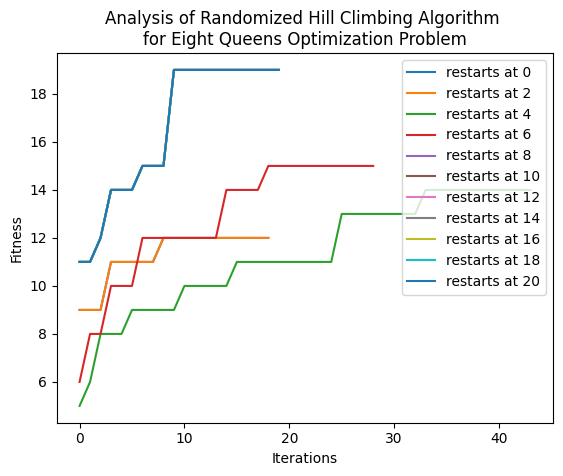

In [ ]:
plt.figure()
for restart in range(0,21,2):
    _, _, fitness_curve_rhc_8q = random_hill_climb(problem=problem_queens, restarts = restart, random_state = 2, max_iters = iterations, curve = True)

    plt.plot(fitness_curve_rhc_8q[:,0], label = f'restarts at {restart}')
plt.title('Analysis of Randomized Hill Climbing Algorithm \nfor Eight Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

<function matplotlib.pyplot.close(fig=None)>

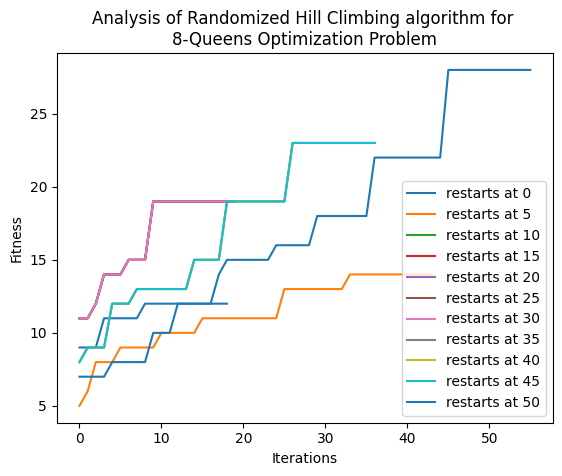

In [ ]:
plt.figure()
for restart in range(0,51,5):
    _, _, fitness_curve_rhc_8q = random_hill_climb(problem_queens, restarts = restart, random_state = 2, max_iters = iterations, curve = True)

    plt.plot(fitness_curve_rhc_8q[:,0], label = f'restarts at {restart}')
plt.title('Analysis of Randomized Hill Climbing algorithm for \n8-Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

<function matplotlib.pyplot.close(fig=None)>

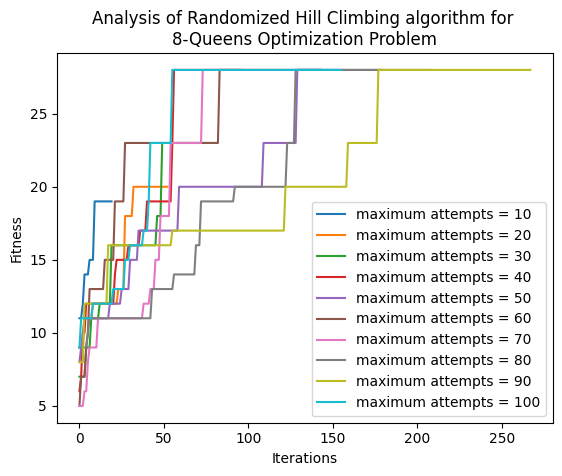

In [ ]:
plt.figure()
for attempts in range(10,110,10):
    _, _, fitness_curve_rhc_8q = random_hill_climb(problem_queens, restarts = 10, max_iters = iterations, random_state = 2, max_attempts = attempts, curve = True)

    plt.plot(fitness_curve_rhc_8q[:,0], label = f'maximum attempts = {attempts}')
plt.title('Analysis of Randomized Hill Climbing algorithm for \n8-Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

### Solving the 8-Queens Problem Using the Simulated Annealing (SA) algorithm

In [ ]:
problem_queens = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness_queens, maximize=False, max_val=8)

In [ ]:
# GeomDecay_start_time = time.time()
# _, GeomDecay_best_fitness, sa_fitness_curve1 = simulated_annealing(problem=problem_queens, schedule = GeomDecay(), random_state = 10, max_iters = iterations, curve = True)
# GeomDecay_total_time = time.time() - GeomDecay_start_time
# print("GeomDecay")
# print("Best value for fitness: "+str(GeomDecay_best_fitness)+" Total time: "+str(GeomDecay_total_time))

# ExpDecay_start_time = time.time()
# _, ExpDecay_best_fitness, sa_fitness_curve2 = simulated_annealing(problem=problem_queens, schedule = ExpDecay(),  random_state = 10, max_iters = iterations, curve = True)
# ExpDecay_total_time = time.time() - ExpDecay_start_time
# print("ExpDecay")
# print("Best value for fitness: "+str(ExpDecay_best_fitness)+" Total time: "+str(ExpDecay_total_time))

# ArithDecay_start_time = time.time()
# _, ArithDecay_best_fitness, sa_fitness_curve3 = simulated_annealing(problem=problem_queens, schedule = ArithDecay(), random_state = 10, max_iters = iterations, curve = True)
# ArithDecay_total_time = time.time() - ArithDecay_start_time
# print("ArithDecay")
# print("Best value for fitness: "+str(ArithDecay_best_fitness)+" Total time: "+str(ArithDecay_total_time))



# import time  # Ensure time is imported if not already
# # List of decay strategies to iterate over
# decay_strategies = [
#     ("GeomDecay", GeomDecay()),
#     ("ExpDecay", ExpDecay()),
#     ("ArithDecay", ArithDecay())
# ]

# for decay_name, decay_strategy in decay_strategies:
#     start_time = time.time()  # Start timing
#     # Perform simulated annealing with the current decay strategy
#     _, best_fitness, fitness_curve = simulated_annealing(
#         problem=problem_queens,
#         schedule=decay_strategy,
#         random_state=10,
#         max_iters=iterations,
#         curve=True
#     )
#     total_time = time.time() - start_time  # Calculate total time
#     # Print the results
#     print(f"{decay_name}")
#     print(f"Best value for fitness: {best_fitness} Total time: {total_time}")


GeomDecay
Best value for fitness: 1.0 Total time: 0.03795886039733887
ExpDecay
Best value for fitness: 2.0 Total time: 0.041712045669555664
ArithDecay
Best value for fitness: 3.0 Total time: 0.04779839515686035


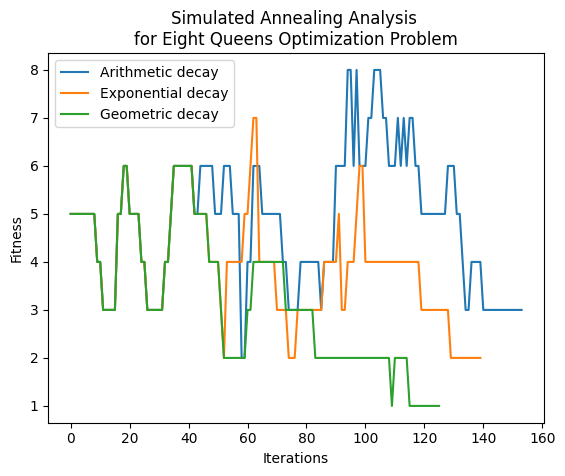

In [ ]:
# plt.figure()
# plt.plot(sa_fitness_curve3[:,0], label = 'Arithmetic decay')
# plt.plot(sa_fitness_curve2[:,0], label = 'Exponential decay')
# plt.plot(sa_fitness_curve1[:,0], label = 'Geometric decay')
# plt.title('Simulated Annealing Analysis \nfor Eight Queens Optimization Problem')
# plt.legend()
# plt.xlabel('Iterations')
# plt.ylabel('Fitness')
# plt.close


def run_simulated_annealing(decay_name, decay_function):
    start_time = time.time()
    _, best_fitness, fitness_curve = simulated_annealing(
        problem=problem_queens,
        schedule=decay_function(),
        random_state=10,
        max_iters=iterations,
        curve=True
    )
    total_time = time.time() - start_time
    print(f"{decay_name}\nBest value for fitness: {best_fitness} Total time: {total_time}")
    return fitness_curve

decay_types = [("GeomDecay", GeomDecay), ("ExpDecay", ExpDecay), ("ArithDecay", ArithDecay)]
fitness_curves = []

for decay_name, decay_function in decay_types:
    fitness_curve = run_simulated_annealing(decay_name, decay_function)
    fitness_curves.append(fitness_curve)

plt.figure()
labels = ['Arithmetic decay', 'Exponential decay', 'Geometric decay']
for curve, label in zip(fitness_curves[::-1], labels):  # Reversing to match original order
    plt.plot(curve[:, 0], label=label)
plt.title('Simulated Annealing Analysis \nfor Eight Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()  # Changed from plt.close() to plt.show() to display the plot

<function matplotlib.pyplot.close(fig=None)>

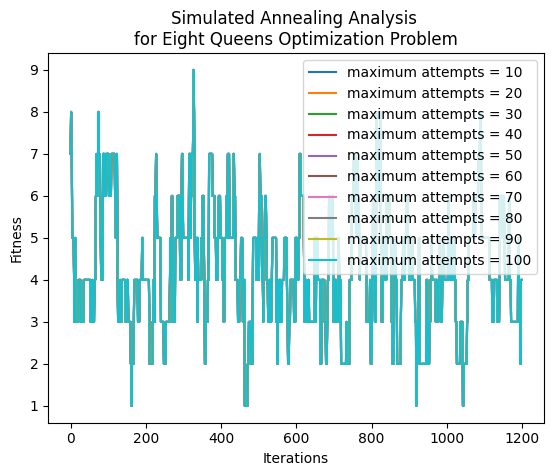

In [ ]:
plt.figure()
for attempts in range(10,110,10):
    _, _, sa_fitness_curve = simulated_annealing(problem=problem_queens, schedule = ArithDecay(), max_iters = iterations, random_state = 2, max_attempts = attempts, curve = True)

    plt.plot(sa_fitness_curve[:,0], label = f'maximum attempts = {attempts}')
plt.title('Simulated Annealing Analysis \nfor Eight Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

[7 0 2 3 5 3 0 4]


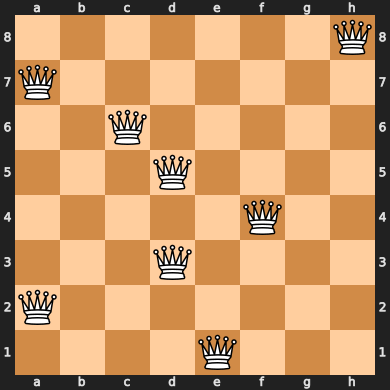

In [ ]:
state = problem_queens.get_state()
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

In [ ]:
# create a runner class and solve the problemn using Simulated Annealing
sa = SARunner(problem=problem_queens,
              experiment_name='queens8_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
              max_attempts=500,
              temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
              decay_list=[mlrose_hiive.GeomDecay])

# the two data frames will contain the results
sa_df_run_stats, sa_df_run_curves = sa.run()

In [ ]:
HTML(sa_df_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:12].to_html())

In [ ]:
state_sample = sa_df_run_stats[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
HTML(state_sample.to_html())

In [ ]:
best_fitness = sa_df_run_curves['Fitness'].min()
best_runs = sa_df_run_curves[sa_df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [ ]:
minimum_evaluations = best_runs['FEvals'].min()

best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

In [ ]:
HTML(best_curve_run.to_html())

In [ ]:
best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp

print(f'Best initial temperature: {best_init_temperature}')

Best initial temperature: 2.0


In [ ]:
run_stats_best_run = sa_df_run_stats[sa_df_run_stats['schedule_init_temp'] == best_init_temperature]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())

[7, 1, 3, 0, 6, 4, 2, 5]


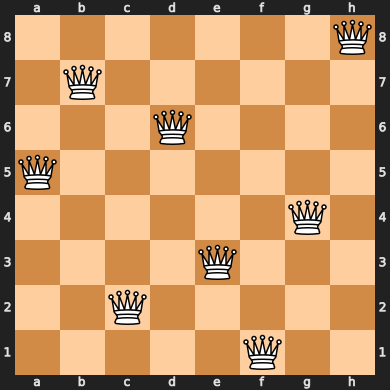

In [ ]:
state = literal_eval(run_stats_best_run['State'].tail(1).values[0])
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

### Solving the 8-Queens Problem using A Genetic algorithm

In [ ]:
problem_queens = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness_queens, maximize=False, max_val=8)

[0 0 0 0 0 0 0 0]


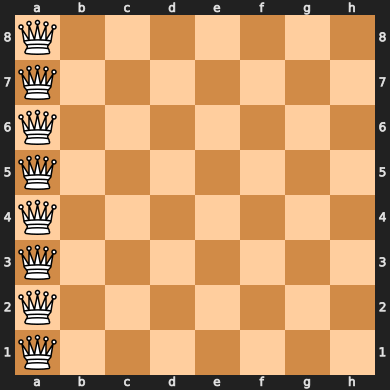

In [ ]:
state = problem_queens.get_state()
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board


In [ ]:
# create a runner class and solve the problem
ga = GARunner(problem=problem_queens,
              experiment_name='queens8_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10, 20, 50],
              mutation_rates=[0.1, 0.2, 0.5])

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()

In [ ]:
HTML(df_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())

In [ ]:
state_sample = df_run_stats[['Population Size', 'Mutation Rate']][:1]
HTML(state_sample.to_html())

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [ ]:
minimum_evaluations = best_runs['FEvals'].min()

best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

In [ ]:
HTML(best_curve_run.to_html())

In [ ]:
best_mr = best_curve_run['Mutation Rate'].iloc()[0]
best_pop_size = best_curve_run['Population Size'].iloc()[0]
print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')

Best Mutation Rate: 0.2, best Population Size: 50


In [ ]:
run_stats_best_run = df_run_stats[(df_run_stats['Mutation Rate'] == best_mr) & (df_run_stats['Population Size'] == best_pop_size)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time']].to_html())

In [ ]:
best_state = run_stats_best_run[['State']].tail(1)
HTML(best_state.to_html())

[4, 6, 0, 2, 7, 5, 3, 1]


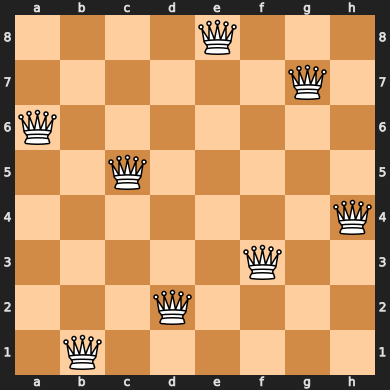

In [ ]:
state = literal_eval(run_stats_best_run['State'].tail(1).values[0])
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

<function matplotlib.pyplot.close(fig=None)>

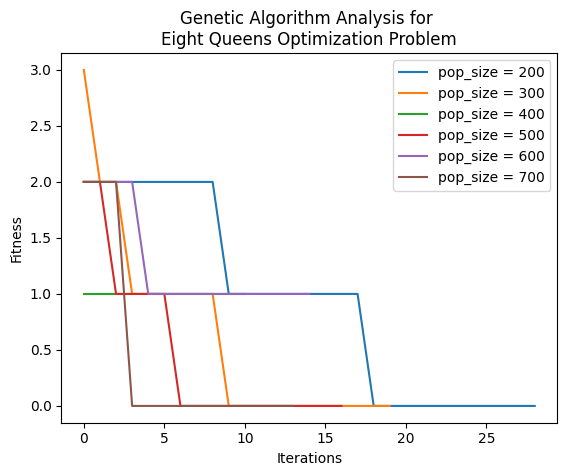

In [ ]:
# plt.figure()
# for pop_size in range(200,800,100):
#     _, _, ga_fitness_curve = genetic_alg(problem_queens, max_iters = iterations, random_state = 2, pop_size = pop_size, curve = True)

#     plt.plot(ga_fitness_curve[:,0], label = f'pop_size = {pop_size}')
# plt.title('Genetic Algorithm Analysis for \nEight Queens Optimization problem')
# plt.legend()
# plt.xlabel('Iterations')
# plt.ylabel('Fitness')
# plt.close


# Set up the figure for plotting
plt.figure()

# Loop through population sizes from 200 to 700 in increments of 100
for population_size in range(200, 800, 100):
    # Run the genetic algorithm with the current population size
    # Note: Assuming 'genetic_alg' and 'problem_queens' are defined elsewhere
    _, _, ga_fitness_curve = genetic_alg(
        problem_queens,
        max_iters=iterations,  # Assuming 'iterations' is defined elsewhere
        random_state=2,
        pop_size=population_size,
        curve=True
    )

    # Plot the fitness curve for the current population size
    plt.plot(ga_fitness_curve[:, 0], label=f'pop_size = {population_size}')

# Configure plot titles and labels
plt.title('Genetic Algorithm Analysis for \nEight Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

<function matplotlib.pyplot.close(fig=None)>

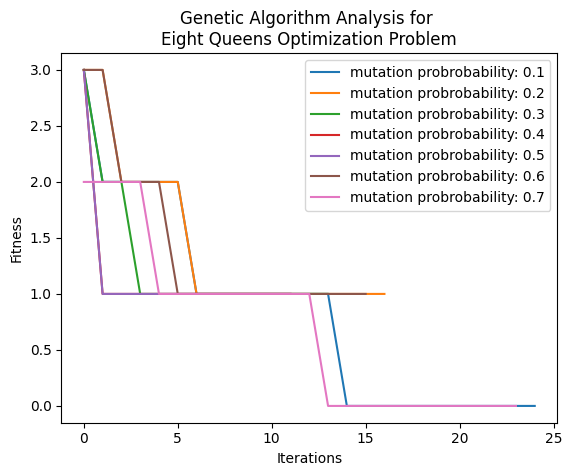

In [ ]:
# plt.figure()
# for prob in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
#     _, _, ga_fitness_curve = genetic_alg(problem, max_iters = iterations, pop_size = 800, random_state = 2, mutation_prob = prob, curve = True)

#     plt.plot(ga_fitness_curve[:,0], label = f'mutation_prob = {prob}')
# plt.title('Genetic Algorithm Analysis for \nEight Queens Optimization Problem)')
# plt.legend()
# plt.xlabel('Iterations')
# plt.ylabel('Fitness')
# plt.close


probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]  # Define probabilities list for easier modification
plt.figure()

# Loop through each probability and plot the fitness curve
for prob in probabilities:
    _, _, ga_fitness_curve = genetic_alg(problem_queens, max_iters=iterations, pop_size=800, mutation_prob=prob, random_state=2, curve=True)
    plt.plot(ga_fitness_curve[:, 0], label=f'mutation probrobability: {prob}')

plt.title('Genetic Algorithm Analysis for \nEight Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

### Solving the 8-Queens Problem using the MIMIC algorithm

In [ ]:
problem_queens = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness_queens, maximize=False, max_val=8)

In [ ]:
# create a runner class and solve the problem
mimic = MIMICRunner(problem=problem_queens,
              experiment_name='queens8_mimic',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=9,
              iteration_list=2 ** np.arange(11),
              population_sizes=[200, 300, 400, 500, 600, 700, 800, 900],
              keep_percent_list=[0.1, 0.2, 0.3, 0.4, 0.5],
              use_fast_mimic=True)

# the two data frames will contain the results
df_mimic_run_stats, df_mimic_run_curves = mimic.run()

In [ ]:
df_mimic_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']]

Iteration  Fitness  FEvals       Time  \
0            0      6.0     200   0.041159   
1            1      2.0     402   0.100664   
2            2      2.0     603   0.148261   
3            4      1.0    1006   0.238190   
4            8      1.0    1810   0.416617   
..         ...      ...     ...        ...   
475         64      1.0   58566  11.676704   
476        128      1.0  116230  22.839149   
477        256      1.0  231558  45.321403   
478        512      1.0  454105  88.594321   
479       1024      1.0  454105  88.594321   

                                        State  
0                    [6, 4, 6, 5, 6, 0, 3, 6]  
1    [7.0, 4.0, 2.0, 0.0, 5.0, 7.0, 5.0, 1.0]  
2    [7.0, 4.0, 2.0, 0.0, 5.0, 7.0, 5.0, 1.0]  
3    [1.0, 4.0, 2.0, 0.0, 6.0, 3.0, 5.0, 7.0]  
4    [1.0, 4.0, 2.0, 0.0, 6.0, 3.0, 5.0, 7.0]  
..                                        ...  
475  [7.0, 4.0, 1.0, 5.0, 0.0, 6.0, 3.0, 5.0]  
476  [7.0, 4.0, 1.0, 5.0, 0.0, 6.0, 3.0, 5.0]  
477  [7.0, 4.0, 1.0, 5.0, 0.0, 6.0, 3.0, 5.0]  
478  [7.0, 4.0, 1.0, 5.0, 0.0, 6.0, 3.0, 5.0]  
479  [7.0, 4.0, 1.0, 5.0, 0.0, 6.0, 3.0, 5.0]  

[480 rows x 5 columns]

In [ ]:
best_mimic_fitness = df_mimic_run_curves['Fitness'].max()
best_mimic_runs = df_mimic_run_curves[df_mimic_run_curves['Fitness'] == best_mimic_fitness]
best_mimic_runs

Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
0              0  0.041159      6.0   200.0            True              200   
504            0  0.041159      6.0   200.0            True              200   
1007           0  0.041159      6.0   200.0            True              200   
1509           0  0.041159      6.0   200.0            True              200   
2015           0  0.041159      6.0   200.0            True              200   
2521           0  0.041159      6.0   300.0            True              300   
3024           0  0.041159      6.0   300.0            True              300   
3529           0  0.041159      6.0   300.0            True              300   
4031           0  0.041159      6.0   300.0            True              300   
4535           0  0.041159      6.0   300.0            True              300   
5045           0  0.041159      6.0   400.0            True              400   
5549           0  0.041159      6.0   400.0            True              400   
6056           0  0.041159      6.0   400.0            True              400   
6560           0  0.041159      6.0   400.0            True              400   
7064           0  0.041159      6.0   400.0            True              400   
7577           0  0.041159      6.0   500.0            True              500   
8081           0  0.041159      6.0   500.0            True              500   
8586           0  0.041159      6.0   500.0            True              500   
9095           0  0.041159      6.0   500.0            True              500   
9599           0  0.041159      6.0   500.0            True              500   
10107          0  0.041159      6.0   600.0            True              600   
10612          0  0.041159      6.0   600.0            True              600   
11116          0  0.041159      6.0   600.0            True              600   
11623          0  0.041159      6.0   600.0            True              600   
12125          0  0.041159      6.0   600.0            True              600   
12633          0  0.041159      6.0   700.0            True              700   
13139          0  0.041159      6.0   700.0            True              700   
13647          0  0.041159      6.0   700.0            True              700   
14154          0  0.041159      6.0   700.0            True              700   
14663          0  0.041159      6.0   700.0            True              700   
15170          0  0.041159      6.0   800.0            True              800   
15676          0  0.041159      6.0   800.0            True              800   
16182          0  0.041159      6.0   800.0            True              800   
16688          0  0.041159      6.0   800.0            True              800   
17199          0  0.041159      6.0   800.0            True              800   
17703          0  0.041159      6.0   900.0            True              900   
18210          0  0.041159      6.0   900.0            True              900   
18719          0  0.041159      6.0   900.0            True              900   
19221          0  0.041159      6.0   900.0            True              900   
19731          0  0.041159      6.0   900.0            True              900   

       Keep Percent  max_iters  
0               0.1       1024  
504             0.2       1024  
1007            0.3       1024  
1509            0.4       1024  
2015            0.5       1024  
2521            0.1       1024  
3024            0.2       1024  
3529            0.3       1024  
4031            0.4       1024  
4535            0.5       1024  
5045            0.1       1024  
5549            0.2       1024  
6056            0.3       1024  
6560            0.4       1024  
7064            0.5       1024  
7577            0.1       1024  
8081            0.2       1024  
8586            0.3       1024  
9095            0.4       1024  
9599            0.5       1024  
10107           0.1       1024  


In [ ]:
HTML(best_mimic_runs.to_html())

In [ ]:
maximum_mimic_evaluations = best_mimic_runs['FEvals'].max()
best_curve_mimic_run = best_mimic_runs[best_mimic_runs['FEvals'] == maximum_mimic_evaluations]
best_curve_mimic_run

Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
17703          0  0.041159      6.0   900.0            True              900   
18210          0  0.041159      6.0   900.0            True              900   
18719          0  0.041159      6.0   900.0            True              900   
19221          0  0.041159      6.0   900.0            True              900   
19731          0  0.041159      6.0   900.0            True              900   

       Keep Percent  max_iters  
17703           0.1       1024  
18210           0.2       1024  
18719           0.3       1024  
19221           0.4       1024  
19731           0.5       1024

In [ ]:
HTML(best_curve_mimic_run.to_html())

In [ ]:
best_kpl = best_curve_mimic_run['Keep Percent'].iloc()[0]
best_pop_size = best_curve_mimic_run['Population Size'].iloc()[0]
print(f'Keep Percent List: {best_kpl}, best Population Size: {best_pop_size}')

Keep Percent List: 0.1, best Population Size: 900


In [ ]:
run_stats_best_run = df_mimic_run_stats[(df_mimic_run_stats['Keep Percent'] == best_kpl) & (df_mimic_run_stats['Population Size'] == best_pop_size)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time']].to_html())

In [ ]:
best_state = run_stats_best_run[['State']].tail(1)
HTML(best_state.to_html())

[4, 6, 1, 3, 7, 0, 2, 5]


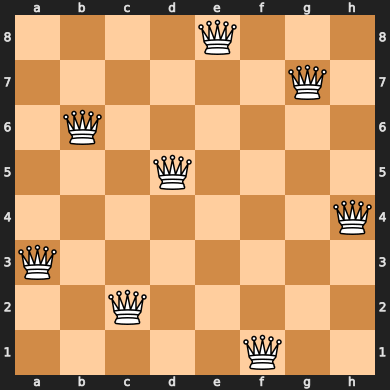

In [ ]:
state = literal_eval(run_stats_best_run['State'].tail(1).values[0])
state = [int(x) for x in state]  # Convert each element to an integer
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
board

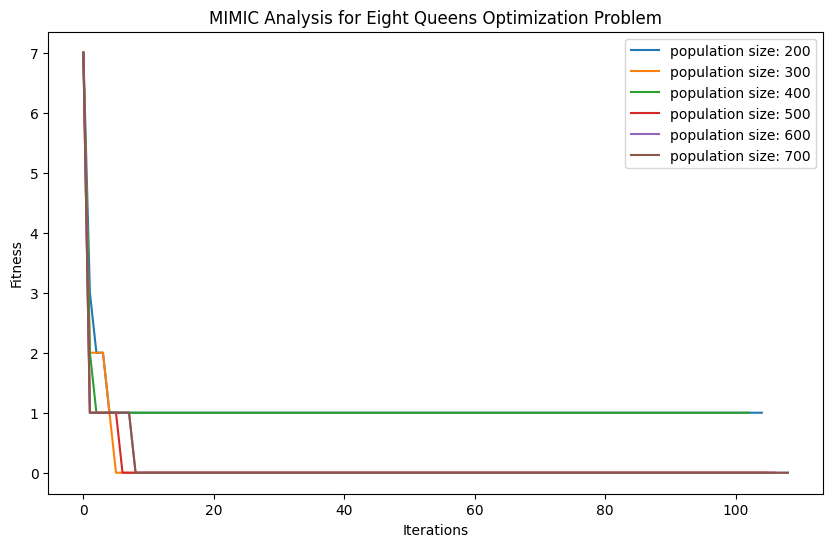

In [ ]:

problem_queens = DiscreteOpt(length=8, fitness_fn=fitness_queens, maximize=False, max_val=8)
iterations = 1000

plt.figure(figsize=(10, 6))
plt.title('MIMIC Analysis for Eight Queens Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

# Enable fast mode for the problem (assuming this method exists for your problem instance)
problem_queens.set_mimic_fast_mode(True)

# Generate and plot fitness curves for various population sizes
for pop_size in range(200, 800, 100):
    # Setup MIMICRunner with the current population size
    mimic_runner = MIMICRunner(problem=problem_queens,
                               experiment_name='MIMIC_Queens',
                               output_directory=None,  # Specify your output directory
                               seed=2,
                               iteration_list=2**np.arange(11),
                               max_attempts=100,
                               population_sizes=[pop_size],
                               keep_percent_list=[0.2],  # Example keep percent, adjust as needed
                               use_fast_mimic=True)

    # Run MIMIC with the current population size
    df_run_stats, df_run_curves = mimic_runner.run()

    # Filter the DataFrame for the current population size
    df_filtered = df_run_curves[(df_run_curves['Population Size'] == pop_size) & (df_run_curves['Keep Percent'] == 0.2)]

    # Sort by Iteration to ensure the curve is plotted correctly
    df_filtered = df_filtered.sort_values('Iteration')

    # Plot the fitness curve for the current population size
    plt.plot(df_filtered['Iteration'], df_filtered['Fitness'], label=f'population size: {pop_size}')

# Finalize and show the plot
plt.legend()
plt.show()


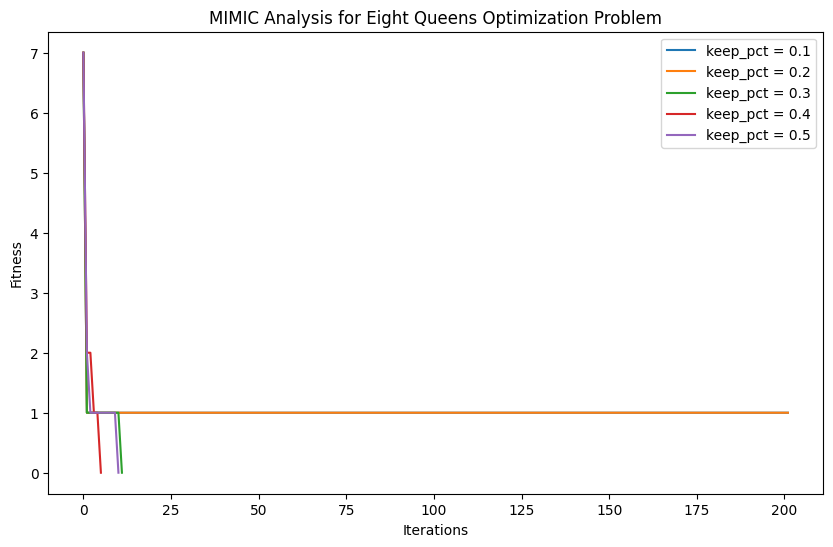

In [ ]:
# def plot_fitness_curve(problem, iterations, pop_size, keep_pct, random_state):
#     _, _, fitness_curve = mimic(problem=problem_queens, max_iters=iterations, pop_size=pop_size, keep_pct=keep_pct, random_state=random_state, curve=True)
#     plt.plot(fitness_curve[:, 0], label=f'keep_pct = {keep_pct}')

# # Initialize plot
# plt.figure()

# # Set parameters
# problem_queens.set_mimic_fast_mode(True)
# pop_size = 800
# random_state = 2

# # Loop through different keep_pct values and plot
# for pct in [0.1, 0.2, 0.3, 0.4, 0.5]:
#     plot_fitness_curve(problem_queens, iterations, pop_size, pct, random_state)

# # Finalize plot
# plt.title('MIMIC Analysis for \nEight Queens Optimization problem')
# plt.legend()
# plt.xlabel('Iterations')
# plt.ylabel('Fitness')
# plt.show()


def plot_fitness_curve(problem, iterations, pop_size, keep_pct, random_state):
    # Setup the MIMICRunner with the given parameters
    mimic_runner = MIMICRunner(problem=problem_queens,
                               experiment_name='MIMIC_Analysis',
                               output_directory=None,  # Specify an output directory for detailed logs
                               seed=random_state,
                               iteration_list=[iterations],
                               max_attempts=int(iterations/5),
                               population_sizes=[pop_size],
                               keep_percent_list=[keep_pct],
                               use_fast_mimic=True)

    # Execute the MIMIC algorithm
    # _, _, fitness_curve = mimic_runner.run()
    result = mimic_runner.run()  # Adjusted line here

    # Assuming the second returned value is the fitness curve, adjust accordingly if needed
    fitness_curve = result[1]  # Adjusted line here

    # Plot the fitness curve
    # plt.plot(fitness_curve[keep_pct]['Fitness'], label=f'keep_pct = {keep_pct}')
    plt.plot(fitness_curve['Fitness'], label=f'keep_pct = {keep_pct}')  # Adjusted line here

# Initialize plot
plt.figure(figsize=(10, 6))

# Set parameters
iterations = 1000  # Assuming 'iterations' is defined somewhere in your original code
problem_queens = QueensGenerator.generate(seed=2, size=8)  # Example problem initialization
problem_queens.set_mimic_fast_mode(True)
pop_size = 900
random_state = 2

# Loop through different keep_pct values and plot
for pct in [0.1, 0.2, 0.3, 0.4, 0.5]:
    plot_fitness_curve(problem_queens, iterations, pop_size, pct, random_state)

# Finalize plot
plt.title('MIMIC Analysis for Eight Queens Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

### Solving the Traveling Salesman Problem (TSP) using the Genetic Algorithm

In [ ]:
# Create list of distances between pairs of cities for ten cities
new_dist_list = [(0, 1, 3.5), (0, 2, 4.5), (0, 3, 6.0), (0, 4, 4.5), \
                 (0, 5, 5.5), (0, 6, 4.5), (0, 7, 3.0), (0, 8, 5.0), (0, 9, 6.5), \
                 (1, 2, 1.5), (1, 3, 3.0), (1, 4, 2.5), (1, 5, 4.5), (1, 6, 4.0), \
                 (1, 7, 2.5), (1, 8, 3.5), (1, 9, 5.0), (2, 3, 2.5), (2, 4, 2.5), \
                 (2, 5, 4.5), (2, 6, 5.5), (2, 7, 3.5), (2, 8, 4.0), (2, 9, 5.5), \
                 (3, 4, 2.5), (3, 5, 3.5), (3, 6, 5.0), (3, 7, 4.0), (3, 8, 5.5), \
                 (3, 9, 6.0), (4, 5, 2.0), (4, 6, 3.5), (4, 7, 2.5), (4, 8, 4.0), \
                 (4, 9, 5.5), (5, 6, 2.5), (5, 7, 3.5), (5, 8, 4.5), (5, 9, 6.0), \
                 (6, 7, 2.5), (6, 8, 3.0), (6, 9, 4.5), (7, 8, 2.5), (7, 9, 3.5), \
                 (8, 9, 2.0)]

# Initialize fitness function object using new_dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances=new_dist_list)

In [ ]:
# Define optimization problem object
problem_tsp = mlrose_hiive.TSPOpt(length=10, fitness_fn=fitness_dists, maximize=False)

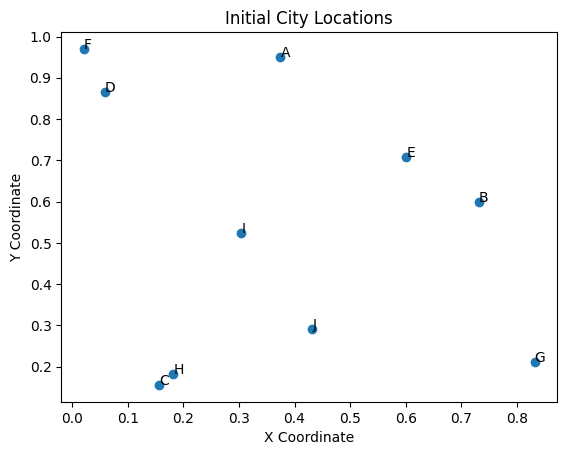

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Prepare a plot, generate node labels from A to J (for 10 cities), and annotate the points with labels
fig, ax = plt.subplots()
cities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
# Randomly generate city locations for visualization purposes
np.random.seed(42)
locations = np.random.rand(10, 2)
ax.scatter(locations[:, 0], locations[:, 1])
for i, city in enumerate(cities):
    ax.annotate(city, (locations[i, 0], locations[i, 1]))
plt.title("Initial City Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [ ]:
# Create a runner class and solve the problem using the genetic algorithm
ga_tsp_runner = mlrose_hiive.GARunner(problem=problem_tsp,
                                  experiment_name="TSP_GA",
                                  output_directory=None, # specify your output directory
                                  seed=None,
                                  iteration_list=2 ** np.arange(10),
                                  max_attempts=10,
                                  population_sizes=[200],
                                  mutation_rates=[0.1])


In [ ]:
# The run method returns a DataFrame with information about each iteration
ga_stats, ga_curve = ga_tsp_runner.run()

In [ ]:
# Display the best state
best_state = ga_stats.loc[ga_stats['Fitness'].idxmin()]['State']
print("Best state (route):", best_state)

Best state (route): [8, 9, 7, 0, 1, 2, 3, 4, 5, 6]


In [ ]:
# Display the best fitness
best_fitness = ga_stats['Fitness'].min()
print("Best fitness (minimum distance):", best_fitness)

Best fitness (minimum distance): 26.0


Text(0.5, 0, 'X Coordinate')

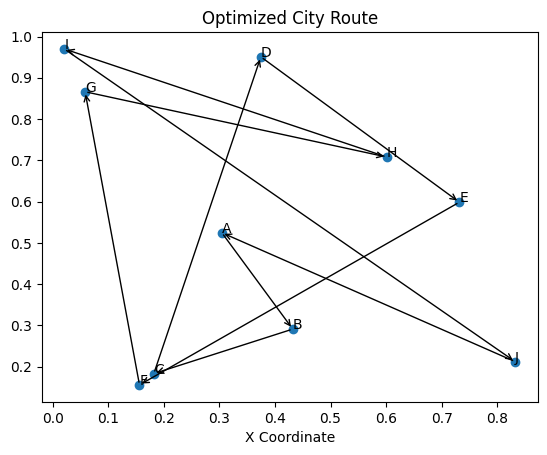

In [ ]:
import ast

# Convert the string representation of the list into an actual list of integers
best_state = ast.literal_eval(best_state)

# Set the random seed for reproducibility
#np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(locations[:, 0], locations[:, 1])
for i, city in enumerate(cities):
    ax.annotate(city, (locations[best_state[i], 0], locations[best_state[i], 1]))

# Draw lines to represent the path
for i in range(len(best_state)):
    start_pos = locations[best_state[i - 1]]
    end_pos = locations[best_state[i]]
    ax.annotate("", xy=end_pos, xycoords='data', xytext=start_pos, textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.title("Optimized City Route")
plt.xlabel("X Coordinate")

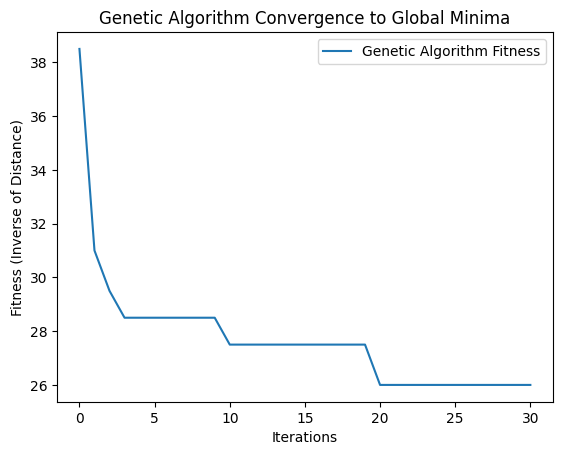

In [ ]:
# Plot the convergence to the global minima
plt.plot(ga_curve['Fitness'], label='Genetic Algorithm Fitness')
plt.title("Genetic Algorithm Convergence to Global Minima")
plt.xlabel("Iterations")
plt.ylabel("Fitness (Inverse of Distance)")
plt.legend()
plt.show()

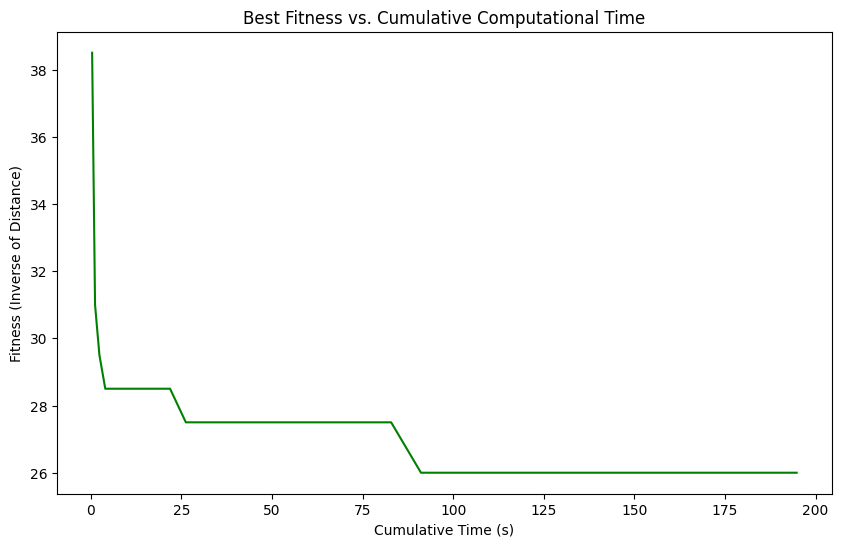

In [ ]:
# Accuracy vs. Fitness Time
# Tracking cumulative time
cumulative_time = np.cumsum(ga_curve['Time'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_time, ga_curve['Fitness'], color='green')
plt.title("Best Fitness vs. Cumulative Computational Time")
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Fitness (Inverse of Distance)")
plt.show()

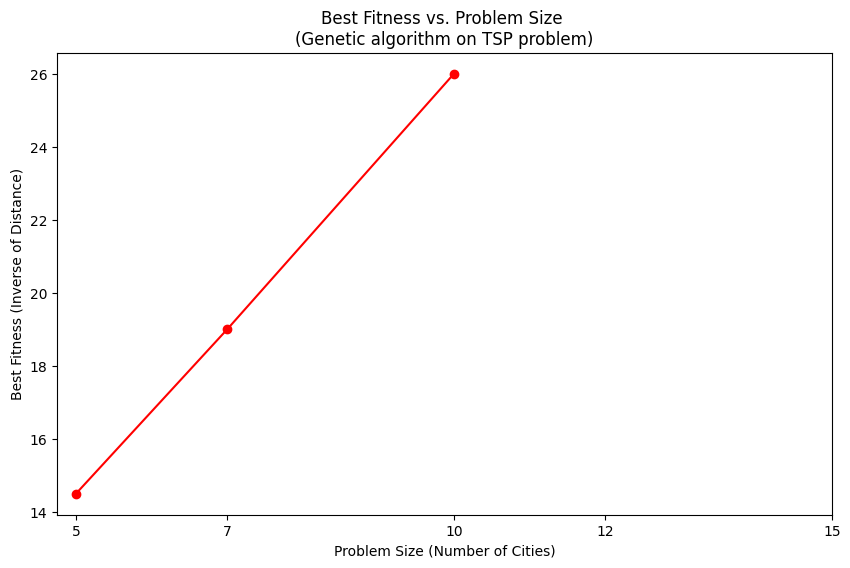

In [ ]:
# Fitness Score vs. Problem Size
# problem_sizes = [5, 7, 10, 12, 15]
problem_sizes = [5, 7, 10, 12, 15]
best_fitness_scores = []

for size in problem_sizes:
    # Redefine problem for each size
    temp_problem_fit = mlrose_hiive.TSPOpt(length=size, fitness_fn=fitness_dists, maximize=False)
    temp_ga_runner = mlrose_hiive.GARunner(problem=temp_problem_fit,
                                           experiment_name=f"TSP_GA_{size}",
                                           output_directory=None,
                                           seed=None,
                                           iteration_list=2 ** np.arange(10),
                                           max_attempts=10,
                                           population_sizes=[200],
                                           mutation_rates=[0.1])
    temp_ga_stats, _ = temp_ga_runner.run()
    best_fitness = temp_ga_stats['Fitness'].min()
    best_fitness_scores.append(best_fitness)

plt.figure(figsize=(10, 6))
plt.plot(problem_sizes, best_fitness_scores, marker='o', linestyle='-', color='red')
plt.title("Best Fitness vs. Problem Size \n(Genetic algorithm on TSP problem)")
plt.xlabel("Problem Size (Number of Cities)")
plt.ylabel("Best Fitness (Inverse of Distance)")
plt.xticks(problem_sizes)
plt.show()

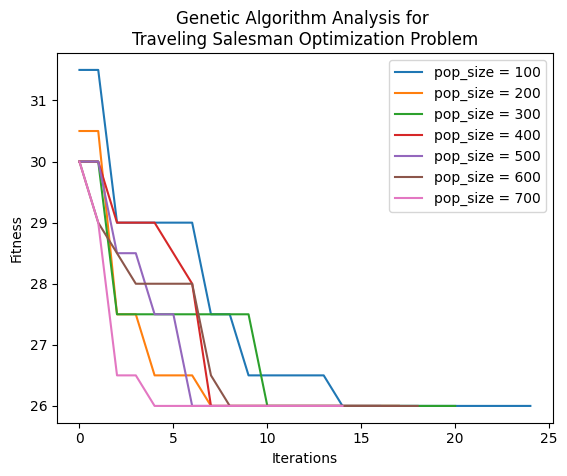

In [ ]:
# Set up the figure for plotting
plt.figure()

# Loop through population sizes from 200 to 700 in increments of 100
for population_size in range(100, 800, 100):
    # Run the genetic algorithm with the current population size
    _, _, ga_fitness_curve = genetic_alg(
        problem_tsp,
        max_iters=iterations,  # Assuming 'iterations' is defined elsewhere
        random_state=2,
        pop_size=population_size,
        curve=True
    )

    # Plot the fitness curve for the current population size
    plt.plot(ga_fitness_curve[:, 0], label=f'pop_size = {population_size}')

# Configure plot titles and labels
plt.title('Genetic Algorithm Analysis for \nTraveling Salesman Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')

# Close the plot to prevent it from displaying in non-interactive environments
plt.show()

<Figure size 1000x600 with 0 Axes>

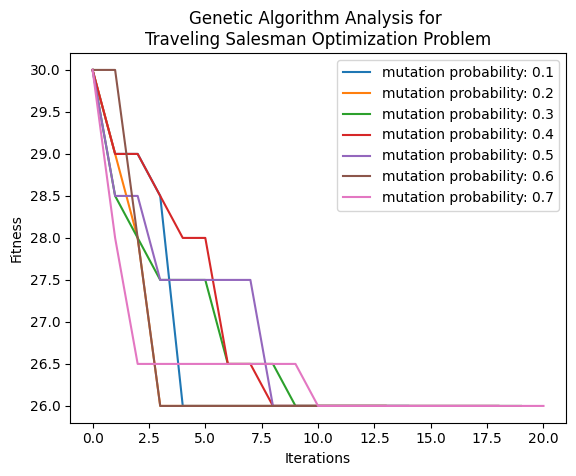

In [ ]:
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]  # Define probabilities list for easier modification
plt.figure(figsize=(10, 6))
plt.figure()

# Loop through each probability and plot the fitness curve
for prob in probabilities:
    _, _, ga_fitness_curve = genetic_alg(problem_tsp, max_iters=iterations, pop_size=800, mutation_prob=prob, random_state=2, curve=True)
    plt.plot(ga_fitness_curve[:, 0], label=f'mutation probability: {prob}')

plt.title('Genetic Algorithm Analysis for \nTraveling Salesman Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

### Solving the Traveling Salesman Problem (TSP) using the Randomized Hill Climbing Algorithm

In [ ]:
# Create list of distances between pairs of cities for ten cities
new_dist_list = [(0, 1, 3.5), (0, 2, 4.5), (0, 3, 6.0), (0, 4, 4.5), \
                 (0, 5, 5.5), (0, 6, 4.5), (0, 7, 3.0), (0, 8, 5.0), (0, 9, 6.5), \
                 (1, 2, 1.5), (1, 3, 3.0), (1, 4, 2.5), (1, 5, 4.5), (1, 6, 4.0), \
                 (1, 7, 2.5), (1, 8, 3.5), (1, 9, 5.0), (2, 3, 2.5), (2, 4, 2.5), \
                 (2, 5, 4.5), (2, 6, 5.5), (2, 7, 3.5), (2, 8, 4.0), (2, 9, 5.5), \
                 (3, 4, 2.5), (3, 5, 3.5), (3, 6, 5.0), (3, 7, 4.0), (3, 8, 5.5), \
                 (3, 9, 6.0), (4, 5, 2.0), (4, 6, 3.5), (4, 7, 2.5), (4, 8, 4.0), \
                 (4, 9, 5.5), (5, 6, 2.5), (5, 7, 3.5), (5, 8, 4.5), (5, 9, 6.0), \
                 (6, 7, 2.5), (6, 8, 3.0), (6, 9, 4.5), (7, 8, 2.5), (7, 9, 3.5), \
                 (8, 9, 2.0)]

# Initialize fitness function object using new_dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances=new_dist_list)

In [ ]:
# Define optimization problem object
problem_tsp = mlrose_hiive.TSPOpt(length=10, fitness_fn=fitness_dists, maximize=False)

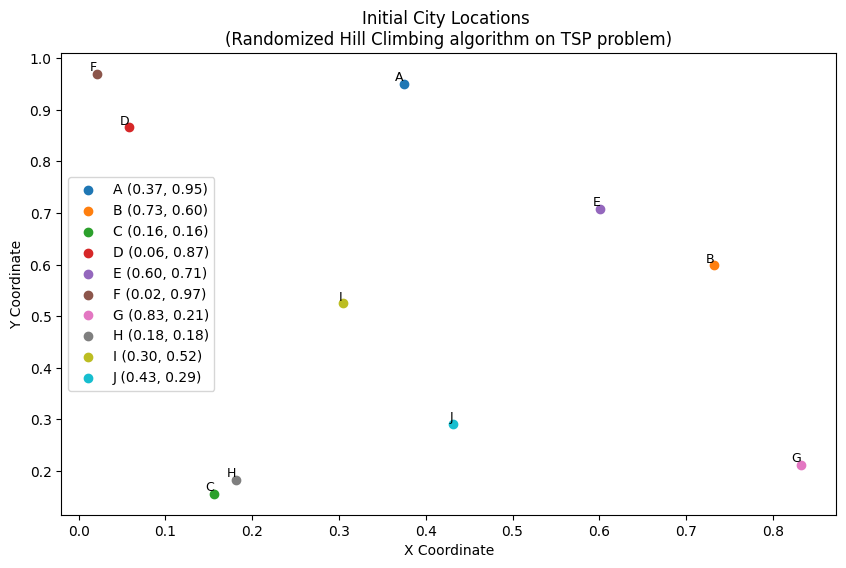

In [ ]:
# # Prepare a plot, generate node labels from A to J (for 10 cities), and annotate the points with labels
# fig, ax = plt.subplots()
# cities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
# # Randomly generate city locations for visualization purposes
# np.random.seed(42)
# locations = np.random.rand(10, 2)
# ax.scatter(locations[:, 0], locations[:, 1])
# for i, city in enumerate(cities):
#     ax.annotate(city, (locations[i, 0], locations[i, 1]))
# plt.title("Initial City Locations")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.show()

# Set the random seed for reproducibility
np.random.seed(42)

# Prepare a plot, generate node labels from A to J (for 10 cities), and annotate the points with labels
coords = [(np.random.rand(), np.random.rand()) for _ in range(10)]
labels = {i: chr(65+i) for i in range(10)}

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y, label=f'{labels[i]} ({x:.2f}, {y:.2f})')
    plt.text(x, y, labels[i], fontsize=9, ha='right', va='bottom')

plt.title('Initial City Locations \n(Randomized Hill Climbing algorithm on TSP problem)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

In [ ]:

# Create a runner class and solve the problem using the Randomized Hill Climbing algorithm
rhc_tsp_runner = RHCRunner(problem=problem_tsp,
                experiment_name='TSP_RHC',
                output_directory=None,
                seed=9,
                iteration_list=2 ** np.arange(11),
                max_attempts=200,
                restart_list=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

tsp_rhc_run_stats, tsp_rhc_run_curves = rhc_tsp_runner.run()

In [ ]:
# Display the best state
best_state_index = tsp_rhc_run_stats['Fitness'].idxmax()
best_state = tsp_rhc_run_stats.loc[best_state_index, 'State']
print('Best state:', best_state)

Best state: [7, 3, 8, 2, 6, 5, 0, 4, 9, 1]


In [ ]:
# Display the best fitness
best_fitness = tsp_rhc_run_stats.loc[best_state_index, 'Fitness']
print('Best fitness:', best_fitness)

Best fitness: 44.5


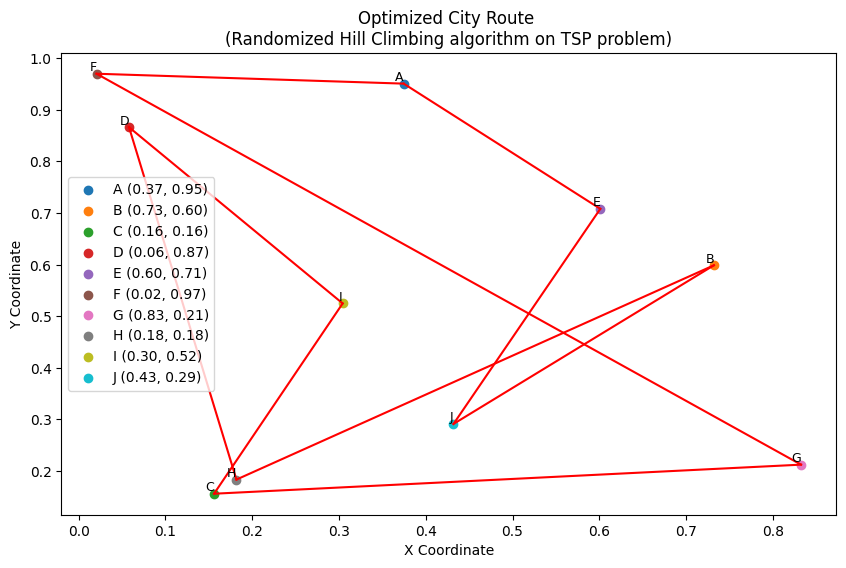

In [ ]:
# Convert the string representation of the list into an actual list of integers
best_state = ast.literal_eval(best_state)

# Set the random seed for reproducibility
#np.random.seed(42)

# Plot the results in a graph
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y, label=f'{labels[i]} ({x:.2f}, {y:.2f})')
    plt.text(x, y, labels[i], fontsize=9, ha='right', va='bottom')

for i in range(len(best_state)):
    start_pos = coords[best_state[i-1]]
    end_pos = coords[best_state[i]]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'r-')

plt.title('Optimized City Route \n(Randomized Hill Climbing algorithm on TSP problem)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


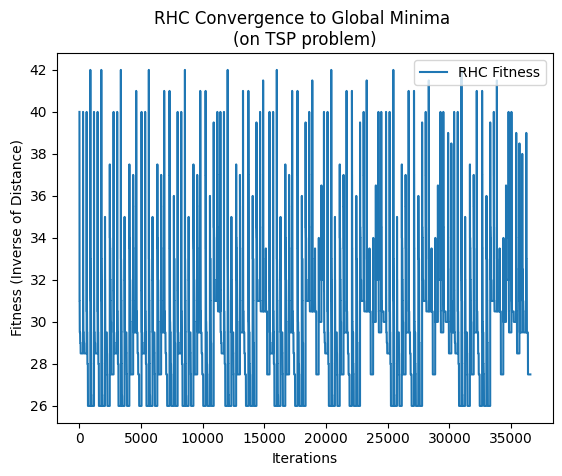

In [ ]:
# Plot the convergence to the global minima
plt.plot(tsp_rhc_run_curves['Fitness'], label='RHC Fitness')
plt.title("RHC Convergence to Global Minima \n(on TSP problem)")
plt.xlabel("Iterations")
plt.ylabel("Fitness (Inverse of Distance)")
plt.legend()
plt.show()

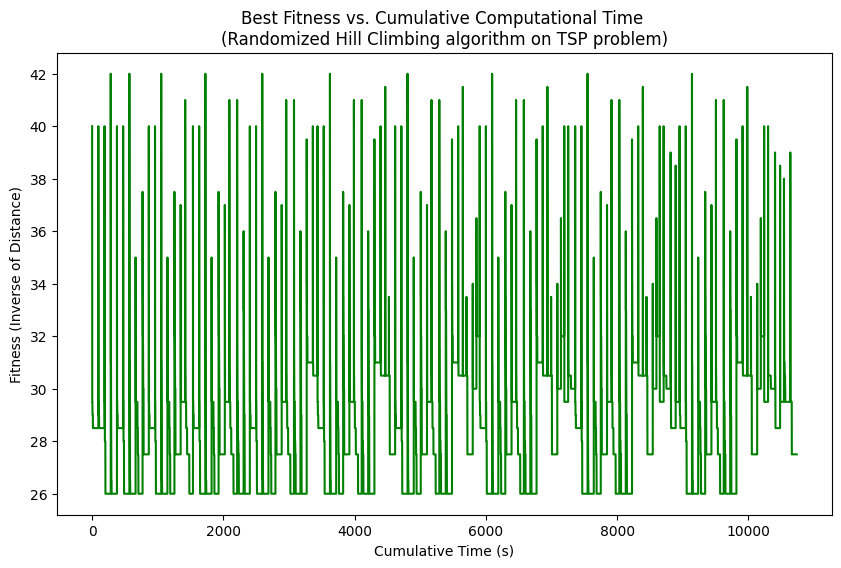

In [ ]:
# Accuracy vs. Fitness Time
# Tracking cumulative time
cumulative_time = np.cumsum(tsp_rhc_run_curves['Time'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_time, tsp_rhc_run_curves['Fitness'], color='green')
plt.title("Best Fitness vs. Cumulative Computational Time \n(Randomized Hill Climbing algorithm on TSP problem)")
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Fitness (Inverse of Distance)")
plt.show()

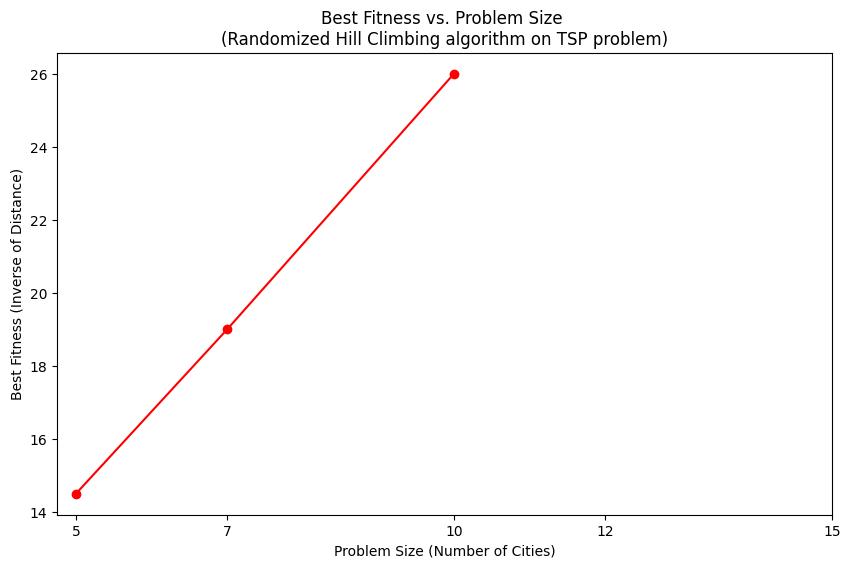

In [ ]:
# Fitness Score vs. Problem Size
problem_sizes = [5, 7, 10, 12, 15]
#problem_sizes = [10, 20, 30, 40, 50]
best_fitness_scores = []

for size in problem_sizes:
    # Redefine problem for each size
    temp_problem_rhc_tsp = mlrose_hiive.TSPOpt(length=size, fitness_fn=fitness_dists, maximize=False)
    temp_rhc_tsp_runner = mlrose_hiive.RHCRunner(problem=temp_problem_rhc_tsp,
                                           experiment_name='TSP_RHC',
                                           output_directory=None,
                                           seed=9,
                                           iteration_list=2 ** np.arange(11),
                                           max_attempts=200,
                                           restart_list=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
    temp_rhc_tsp_stats, _ = temp_rhc_tsp_runner.run()
    best_fitness = temp_rhc_tsp_stats['Fitness'].min()
    best_fitness_scores.append(best_fitness)

plt.figure(figsize=(10, 6))
plt.plot(problem_sizes, best_fitness_scores, marker='o', linestyle='-', color='red')
plt.title("Best Fitness vs. Problem Size \n(Randomized Hill Climbing algorithm on TSP problem)")
plt.xlabel("Problem Size (Number of Cities)")
plt.ylabel("Best Fitness (Inverse of Distance)")
plt.xticks(problem_sizes)
plt.show()

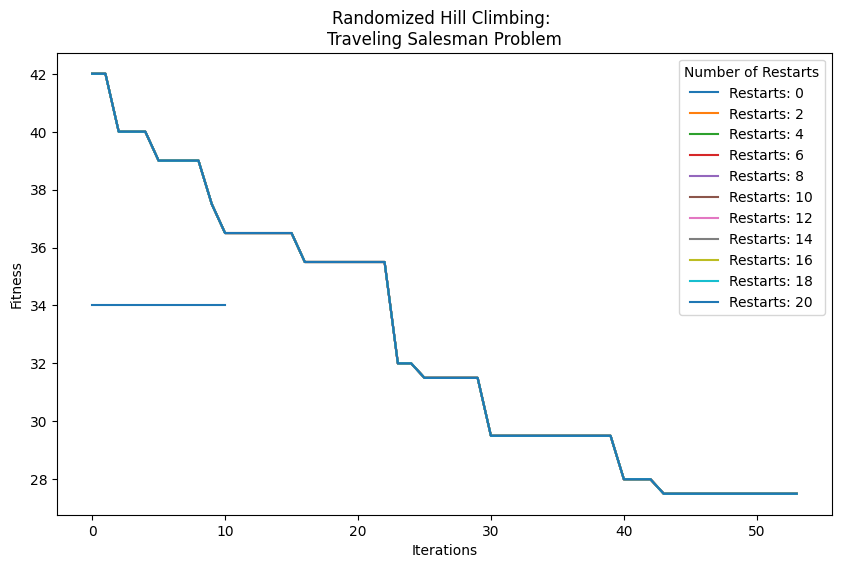

In [ ]:

def plot_fitness_curves(problem_tsp, iterations=80, max_restarts=20, step=2, random_state=2):
    plt.figure(figsize=(10, 6))
    for restart in range(0, max_restarts + 1, step):
        _, _, tsp_fitness_curve = random_hill_climb(problem=problem_tsp, restarts=restart,
                                                random_state=random_state, max_iters=iterations, curve=True)
        plt.plot(tsp_fitness_curve[:, 0], label=f'Restarts: {restart}')

    plt.title('Randomized Hill Climbing: \nTraveling Salesman Problem')
    plt.legend(title='Number of Restarts')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.show()

# Call the function with the appropriate parameters
plot_fitness_curves(problem_tsp, iterations)

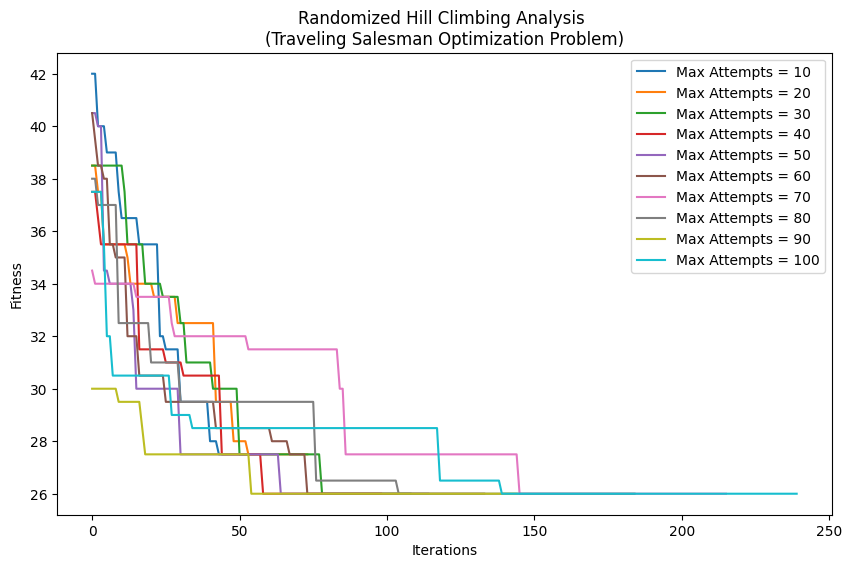

In [ ]:
#iterations = 1000
# Define a function to perform the Randomized Hill Climb and plot the results
def plot_rhc_analysis(problem, iterations, start=10, stop=110, step=10, restarts=10, random_state=2):
    plt.figure(figsize=(10, 6))

    # Loop through the specified range of maximum attempts
    for attempts in range(start, stop, step):
        # Perform Randomized Hill Climb with given parameters
        _, _, rhc_fitness_curve = random_hill_climb(
            problem_tsp,
            restarts=restarts,
            max_iters=iterations,
            random_state=random_state,
            max_attempts=attempts,
            curve=True
        )

        # Plot the fitness curve
        plt.plot(rhc_fitness_curve[:, 0], label=f'Max Attempts = {attempts}')

    # Set plot titles and labels
    plt.title('Randomized Hill Climbing Analysis \n(Traveling Salesman Optimization Problem)')
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')

    # Close the plot to prevent it from displaying automatically
    plt.show()

# Assuming 'problem' and 'iterations' variables are defined elsewhere in your code
plot_rhc_analysis(problem_tsp, iterations)


### Solving the Traveling Salesman Problem (TSP) using the Simulated Annealing Algorithm

In [ ]:
# Create list of distances between pairs of cities for ten cities
new_dist_list = [(0, 1, 3.5), (0, 2, 4.5), (0, 3, 6.0), (0, 4, 4.5), \
                 (0, 5, 5.5), (0, 6, 4.5), (0, 7, 3.0), (0, 8, 5.0), (0, 9, 6.5), \
                 (1, 2, 1.5), (1, 3, 3.0), (1, 4, 2.5), (1, 5, 4.5), (1, 6, 4.0), \
                 (1, 7, 2.5), (1, 8, 3.5), (1, 9, 5.0), (2, 3, 2.5), (2, 4, 2.5), \
                 (2, 5, 4.5), (2, 6, 5.5), (2, 7, 3.5), (2, 8, 4.0), (2, 9, 5.5), \
                 (3, 4, 2.5), (3, 5, 3.5), (3, 6, 5.0), (3, 7, 4.0), (3, 8, 5.5), \
                 (3, 9, 6.0), (4, 5, 2.0), (4, 6, 3.5), (4, 7, 2.5), (4, 8, 4.0), \
                 (4, 9, 5.5), (5, 6, 2.5), (5, 7, 3.5), (5, 8, 4.5), (5, 9, 6.0), \
                 (6, 7, 2.5), (6, 8, 3.0), (6, 9, 4.5), (7, 8, 2.5), (7, 9, 3.5), \
                 (8, 9, 2.0)]

# Initialize fitness function object using new_dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances=new_dist_list)

In [ ]:
# Define optimization problem object
problem_sa = mlrose_hiive.TSPOpt(length=10, fitness_fn=fitness_dists, maximize=False)

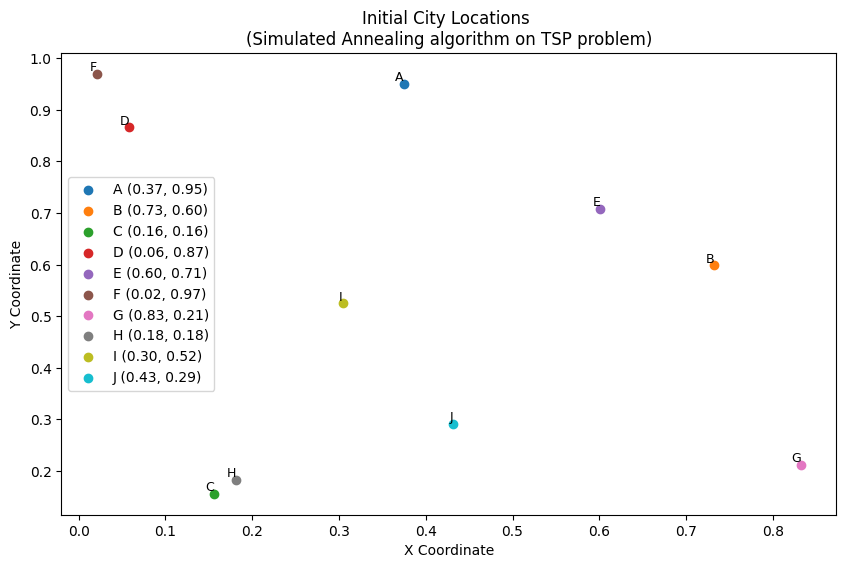

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Prepare a plot, generate node labels from A to J (for 10 cities), and annotate the points with labels
coords = [(np.random.rand(), np.random.rand()) for _ in range(10)]
labels = {i: chr(65+i) for i in range(10)}

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y, label=f'{labels[i]} ({x:.2f}, {y:.2f})')
    plt.text(x, y, labels[i], fontsize=9, ha='right', va='bottom')

plt.title('Initial City Locations \n(Simulated Annealing algorithm on TSP problem)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

In [ ]:
sa_tsp_runner = SARunner(problem=problem_sa,
              experiment_name='TSP_SA',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=9,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              #temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
              temperature_list=[10, 50, 100, 250, 500, 1000],
              #decay_list=[mlrose_hiive.GeomDecay])
              decay_list=[mlrose_hiive.ExpDecay])

# the two data frames will contain the results
sa_tsp_run_stats, sa_tsp_run_curves = sa_tsp_runner.run()

In [ ]:
sa_tsp_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']]

Iteration  Fitness  FEvals      Time                           State
0           0     40.0       0  0.005713  [8, 4, 7, 2, 1, 9, 3, 0, 6, 5]
1           1     33.5       2  0.012065  [8, 4, 3, 2, 1, 9, 7, 0, 6, 5]
2           2     36.5       4  0.017506  [8, 0, 3, 2, 1, 9, 7, 4, 6, 5]
3           4     35.5       8  0.026838  [1, 0, 3, 2, 7, 9, 8, 4, 6, 5]
4           8     41.0      15  0.041906  [1, 8, 3, 7, 0, 9, 2, 4, 6, 5]
..        ...      ...     ...       ...                             ...
67         64     34.0     128  0.322204  [8, 7, 4, 6, 5, 1, 2, 3, 0, 9]
68        128     41.0     256  0.581444  [3, 4, 9, 5, 2, 6, 7, 0, 8, 1]
69        256     40.0     510  1.087664  [9, 2, 4, 0, 7, 3, 8, 6, 5, 1]
70        512     40.5    1019  2.119848  [4, 8, 0, 5, 9, 2, 1, 6, 7, 3]
71       1024     40.0    2012  4.198886  [9, 6, 7, 5, 1, 8, 2, 4, 3, 0]

[72 rows x 5 columns]

In [ ]:
best_sa_tsp_fitness = sa_tsp_run_curves['Fitness'].max()
best_sa_tsp_runs = sa_tsp_run_curves[sa_tsp_run_curves['Fitness'] == best_sa_tsp_fitness]
best_sa_tsp_runs

Iteration      Time  Fitness  FEvals Temperature  max_iters
3288        500  1.633261     47.0   992.0         250       1024

In [ ]:
maximum_sa_tsp_evaluations = best_sa_tsp_runs['FEvals'].max()
best_curve_sa_tsp_run = best_sa_tsp_runs[best_sa_tsp_runs['FEvals'] == maximum_sa_tsp_evaluations]
best_curve_sa_tsp_run

Iteration      Time  Fitness  FEvals Temperature  max_iters
3288        500  1.633261     47.0   992.0         250       1024

In [ ]:
# Disply the best state
# print("Best State:\n", best_state)
#print("Best State:", maximum_sa_tsp_evaluations)

best_state_index = sa_tsp_run_stats['Fitness'].idxmax()
best_state = sa_tsp_run_stats.loc[best_state_index, 'State']
print('Best state:', best_state)

Best state: [0, 9, 3, 8, 2, 7, 6, 1, 4, 5]


In [ ]:
# Display the best fitness
# print("Best Fitness:", best_fitness)
print("Best Fitness:", best_sa_tsp_fitness)

Best Fitness: 47.0


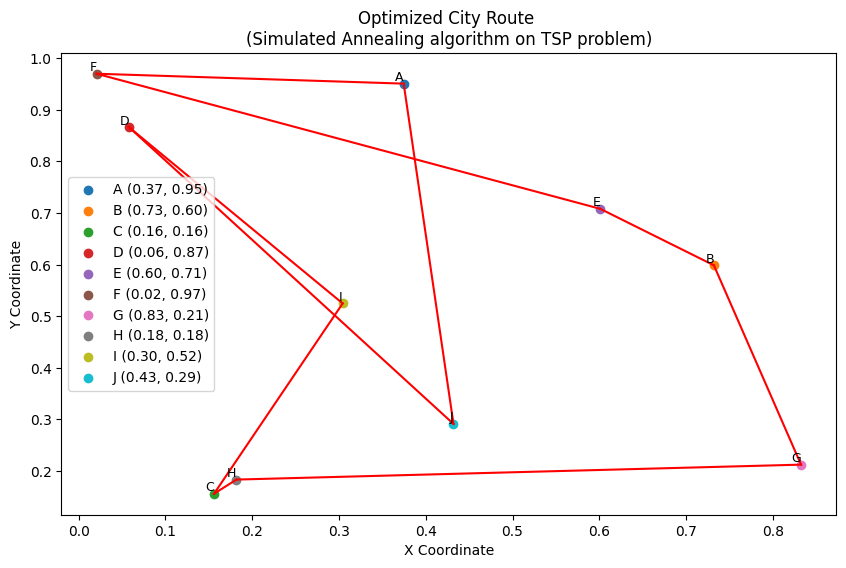

In [ ]:
# Convert the string representation of the list into an actual list of integers
best_state = ast.literal_eval(best_state)

# Plot the results in a graph
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y, label=f'{labels[i]} ({x:.2f}, {y:.2f})')
    plt.text(x, y, labels[i], fontsize=9, ha='right', va='bottom')

for i in range(len(best_state)):
    start_pos = coords[best_state[i-1]]
    end_pos = coords[best_state[i]]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'r-')

plt.title('Optimized City Route \n(Simulated Annealing algorithm on TSP problem)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()



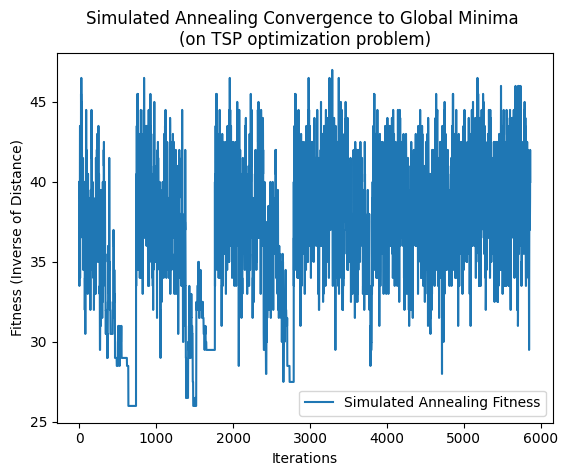

In [ ]:
# Plot the convergence to the global minima
plt.plot(sa_tsp_run_curves['Fitness'], label='Simulated Annealing Fitness')
plt.title("Simulated Annealing Convergence to Global Minima \n(on TSP optimization problem)")
plt.xlabel("Iterations")
plt.ylabel("Fitness (Inverse of Distance)")
plt.legend()
plt.show()

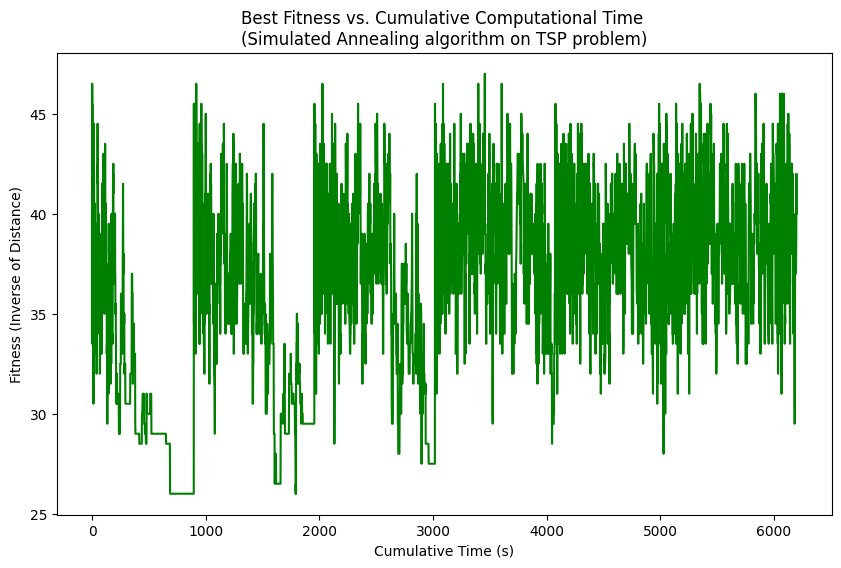

In [ ]:
# Accuracy vs. Fitness Time
# Tracking cumulative time
cumulative_time = np.cumsum(sa_tsp_run_curves['Time'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_time, sa_tsp_run_curves['Fitness'], color='green')
plt.title("Best Fitness vs. Cumulative Computational Time \n(Simulated Annealing algorithm on TSP problem)")
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Fitness (Inverse of Distance)")
plt.show()

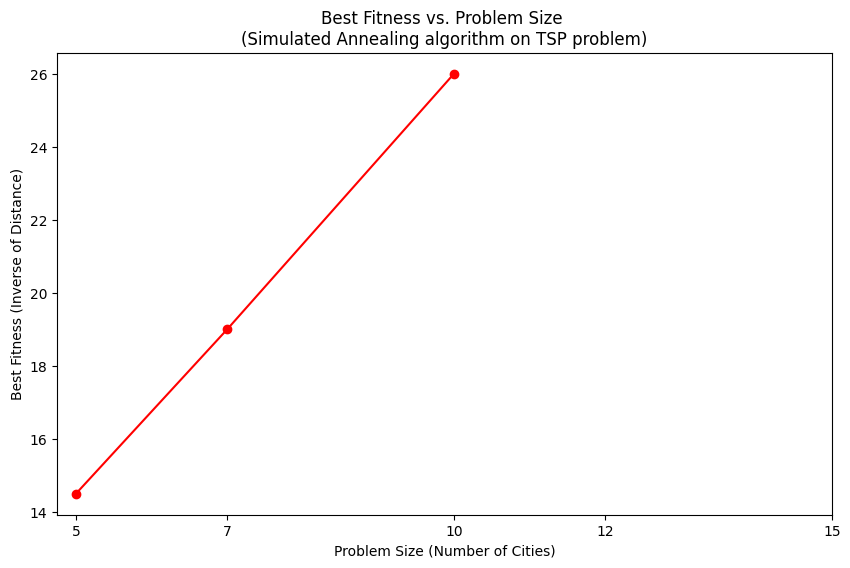

In [ ]:
# Fitness Score vs. Problem Size
problem_sizes = [5, 7, 10, 12, 15]
#problem_sizes = [10, 20, 30, 40, 50]
best_fitness_scores = []

for size in problem_sizes:
    # Redefine problem for each size
    temp_problem_sa_tsp = mlrose_hiive.TSPOpt(length=size, fitness_fn=fitness_dists, maximize=False)
    temp_sa_tsp_runner = mlrose_hiive.SARunner(problem=temp_problem_sa_tsp,
                                           experiment_name='TSP_SA',
                                           output_directory=None,
                                           seed=9,
                                           iteration_list=2 ** np.arange(11),
                                           max_attempts=100,
                                           temperature_list=[10, 50, 100, 250, 500, 1000],
                                           decay_list=[mlrose_hiive.ExpDecay])
    temp_sa_tsp_stats, _ = temp_sa_tsp_runner.run()
    best_fitness = temp_sa_tsp_stats['Fitness'].min()
    best_fitness_scores.append(best_fitness)

plt.figure(figsize=(10, 6))
plt.plot(problem_sizes, best_fitness_scores, marker='o', linestyle='-', color='red')
plt.title("Best Fitness vs. Problem Size \n(Simulated Annealing algorithm on TSP problem)")
plt.xlabel("Problem Size (Number of Cities)")
plt.ylabel("Best Fitness (Inverse of Distance)")
plt.xticks(problem_sizes)
plt.show()

In [ ]:

# List of decay strategies with their corresponding labels
decay_strategies = [("GeomDecay", GeomDecay()), ("ExpDecay", ExpDecay()), ("ArithDecay", ArithDecay())]

for label, strategy in decay_strategies:
    start_time = time.time()
    _, best_fitness, fitness_curve = simulated_annealing(problem_sa, schedule=strategy, random_state=2, max_iters=iterations, curve=True)
    total_time = time.time() - start_time
    print(f"{label}")
    print(f"Best fitness: {best_fitness} Total time: {total_time}")



GeomDecay
Best fitness: 34.0 Total time: 0.0302276611328125
ExpDecay
Best fitness: 34.0 Total time: 0.026195526123046875
ArithDecay
Best fitness: 34.0 Total time: 0.027172088623046875


Geometric Decay
Best fitness: 34.0 Total time: 0.028248071670532227
Exponential Decay
Best fitness: 34.0 Total time: 0.026548147201538086
Arithmetic Decay
Best fitness: 34.0 Total time: 0.0264132022857666


<function matplotlib.pyplot.close(fig=None)>

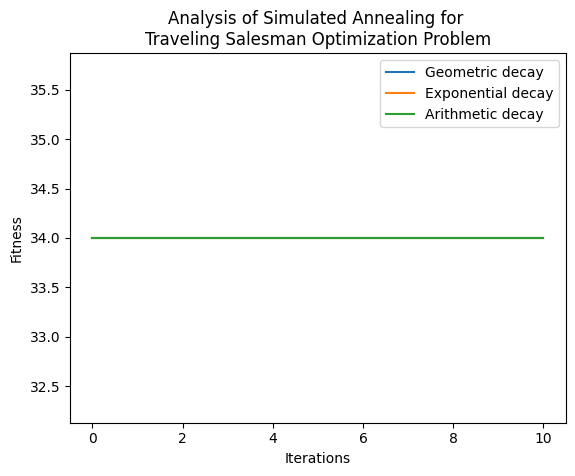

In [ ]:

problem_sa = mlrose_hiive.TSPOpt(length=10, fitness_fn=fitness_dists, maximize=False)

GeomDecay_start_time = time.time()
_, GeomDecay_best_fitness, sa_fitness_curve1 = simulated_annealing(problem=problem_sa, schedule = GeomDecay(), random_state = 2, max_iters = iterations, curve = True)
GeomDecay_total_time = time.time() - GeomDecay_start_time
print("Geometric Decay")
print("Best fitness: "+str(GeomDecay_best_fitness)+" Total time: "+str(GeomDecay_total_time))

ExpDecay_start_time = time.time()
_, ExpDecay_best_fitness, sa_fitness_curve2 = simulated_annealing(problem=problem_sa, schedule = ExpDecay(),  random_state = 2, max_iters = iterations, curve = True)
ExpDecay_total_time = time.time() - ExpDecay_start_time
print("Exponential Decay")
print("Best fitness: "+str(ExpDecay_best_fitness)+" Total time: "+str(ExpDecay_total_time))

ArithDecay_start_time = time.time()
_, ArithDecay_best_fitness, sa_fitness_curve3 = simulated_annealing(problem=problem_sa, schedule = ArithDecay(), random_state = 2, max_iters = iterations, curve = True)
ArithDecay_total_time = time.time() - ArithDecay_start_time
print("Arithmetic Decay")
print("Best fitness: "+str(ArithDecay_best_fitness)+" Total time: "+str(ArithDecay_total_time))



plt.figure()
plt.figsizes=(10,6)
plt.plot(sa_fitness_curve1[:,0], label = 'Geometric decay')
plt.plot(sa_fitness_curve2[:,0], label = 'Exponential decay')
plt.plot(sa_fitness_curve3[:,0], label = 'Arithmetic decay')
plt.title('Analysis of Simulated Annealing for \nTraveling Salesman Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

Geometric Decay
Best fitness: 34.0 Total time: 0.027995824813842773
Exponential Decay
Best fitness: 34.0 Total time: 0.026377439498901367
Arithmetic Decay
Best fitness: 34.0 Total time: 0.02795553207397461


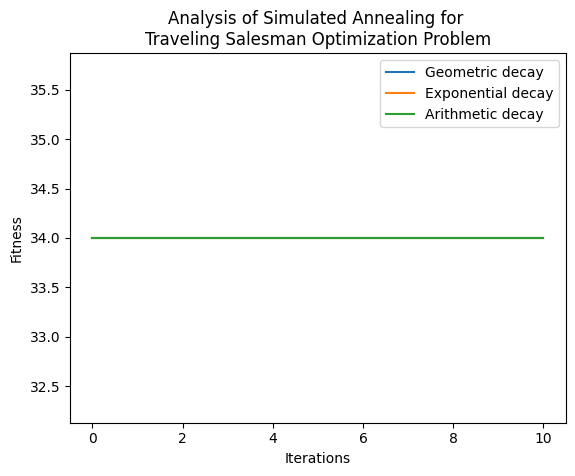

In [ ]:
# plt.figure()
# plt.plot(sa_fitness_curve1[:,0], label = 'Geometric decay')
# plt.plot(sa_fitness_curve2[:,0], label = 'Exponential decay')
# plt.plot(sa_fitness_curve3[:,0], label = 'Arithmetic decay')
# plt.title('Analysis of Simulated Annealing for \nTraveling Salesman Optimization Problem')
# plt.legend()
# plt.xlabel('Iterations')
# plt.ylabel('Fitness')
# plt.close

def run_simulated_annealing(schedule_name, schedule_obj, problem, random_state, max_iters):
    start_time = time.time()
    #_, best_fitness, fitness_curve = simulated_annealing(problem=problem_tsp, schedule=schedule_obj, random_state=random_state, max_iters=max_iters, curve=True)
    _, best_fitness, ftiness_curve = simulated_annealing(problem=problem_sa, schedule=schedule_obj, random_state=2, max_iters=max_iters, curve=True)

    total_time = time.time() - start_time
    print(f"{schedule_name} Decay")
    print(f"Best fitness: {best_fitness} Total time: {total_time}")
    return fitness_curve

# Assuming problem_sa, simulated_annealing, GeomDecay, ExpDecay, ArithDecay are already defined
random_state = 2
iterations = 1000  # Assuming 'iterations' is defined earlier in the code

# Run simulated annealing with different decay schedules
sa_fitness_curve1 = run_simulated_annealing("Geometric", GeomDecay(), problem_sa, random_state, iterations)
sa_fitness_curve2 = run_simulated_annealing("Exponential", ExpDecay(), problem_sa, random_state, iterations)
sa_fitness_curve3 = run_simulated_annealing("Arithmetic", ArithDecay(), problem_sa, random_state, iterations)

# Plotting the fitness curves
plt.figure()
plt.figsizes=(10,6)
plt.plot(sa_fitness_curve1[:, 0], label='Geometric decay')
plt.plot(sa_fitness_curve2[:, 0], label='Exponential decay')
plt.plot(sa_fitness_curve3[:, 0], label='Arithmetic decay')
plt.title('Analysis of Simulated Annealing for \nTraveling Salesman Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()  # Replaced plt.close with plt.show() to display the plot

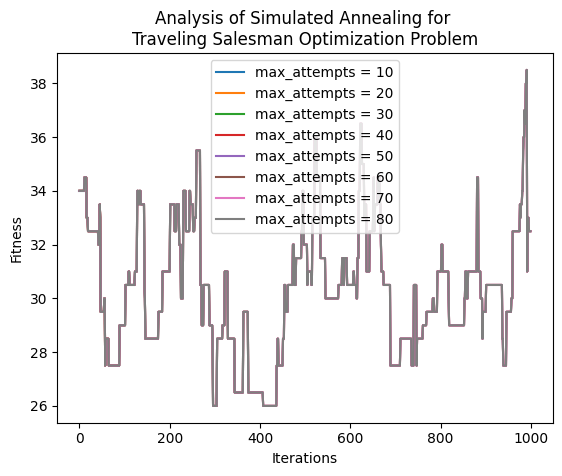

In [ ]:
plt.figure()
for attempts in range(10,90,10):
    _, _, sa_fitness_curve = simulated_annealing(problem_sa, schedule = ArithDecay(), max_iters = iterations, random_state = 2, max_attempts = attempts, curve = True)

    plt.plot(sa_fitness_curve[:,0], label = f'max_attempts = {attempts}')
plt.title('Analysis of Simulated Annealing for \nTraveling Salesman Optimization Problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.show()

### Solving the Traveling Salesman Problem (TSP) using the MIMIC Algorithm

In [ ]:
# Create list of distances between pairs of cities for ten cities
new_dist_list = [(0, 1, 3.5), (0, 2, 4.5), (0, 3, 6.0), (0, 4, 4.5), \
                 (0, 5, 5.5), (0, 6, 4.5), (0, 7, 3.0), (0, 8, 5.0), (0, 9, 6.5), \
                 (1, 2, 1.5), (1, 3, 3.0), (1, 4, 2.5), (1, 5, 4.5), (1, 6, 4.0), \
                 (1, 7, 2.5), (1, 8, 3.5), (1, 9, 5.0), (2, 3, 2.5), (2, 4, 2.5), \
                 (2, 5, 4.5), (2, 6, 5.5), (2, 7, 3.5), (2, 8, 4.0), (2, 9, 5.5), \
                 (3, 4, 2.5), (3, 5, 3.5), (3, 6, 5.0), (3, 7, 4.0), (3, 8, 5.5), \
                 (3, 9, 6.0), (4, 5, 2.0), (4, 6, 3.5), (4, 7, 2.5), (4, 8, 4.0), \
                 (4, 9, 5.5), (5, 6, 2.5), (5, 7, 3.5), (5, 8, 4.5), (5, 9, 6.0), \
                 (6, 7, 2.5), (6, 8, 3.0), (6, 9, 4.5), (7, 8, 2.5), (7, 9, 3.5), \
                 (8, 9, 2.0)]

# Initialize fitness function object using new_dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances=new_dist_list)

In [ ]:
# Define optimization problem object
problem_tsp_mimic = mlrose_hiive.TSPOpt(length=10, fitness_fn=fitness_dists, maximize=False)

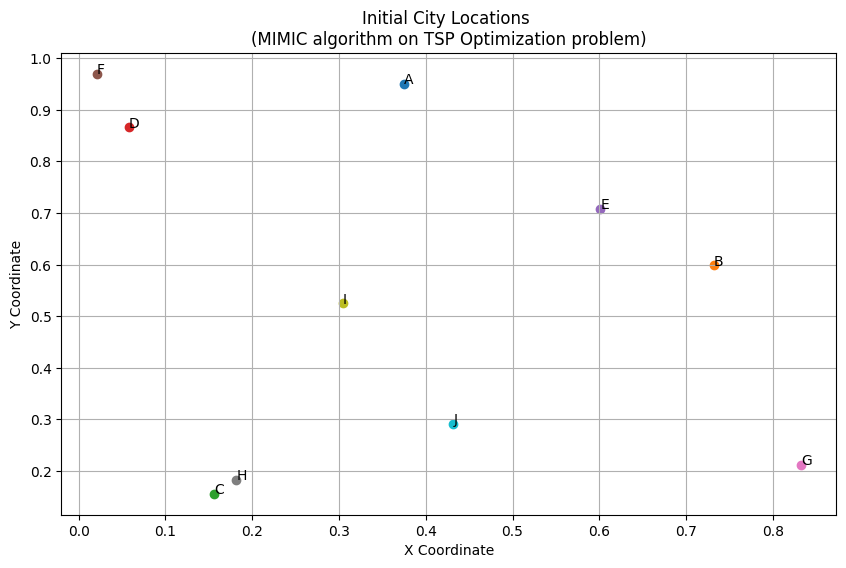

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Prepare a plot, generate node labels from A to J (for 10 cities), and annotate the points with labels
coords = np.random.rand(10, 2)  # Randomly generate coordinates for the cities for visualization

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y)
    plt.annotate(chr(65 + i), (x, y))

plt.title('Initial City Locations \n(MIMIC algorithm on TSP Optimization problem)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

In [ ]:
# Create a runner class and solve the problem using MIMIC
from mlrose_hiive import MIMICRunner

mimic_tsp_runner = MIMICRunner(problem=problem_tsp_mimic,
                           experiment_name="TSP_MIMIC",
                           output_directory=None,
                           seed=9,
                           iteration_list=2 ** np.arange(12),
                           max_attempts=100,
                           population_sizes=[200, 300, 400, 500, 600, 700, 800, 900],
                           keep_percent_list=[0.1, 0.2, 0.3, 0.4, 0.5],
                           use_fast_mimic=True)

# Run the MIMIC algorithm
mimic_tsp_stats, mimic_tsp_curve = mimic_tsp_runner.run()

In [ ]:
# Display the best state
best_state = mimic_tsp_stats.loc[mimic_tsp_stats['Fitness'].idxmax()]['State']
print(f"Best State:\n{best_state}")

Best State:
[8, 4, 7, 2, 1, 9, 3, 0, 6, 5]


In [ ]:
# Display the best fitness
best_fitness = mimic_tsp_stats['Fitness'].max()
print(f"Best Fitness: {best_fitness}")

Best Fitness: 40.0


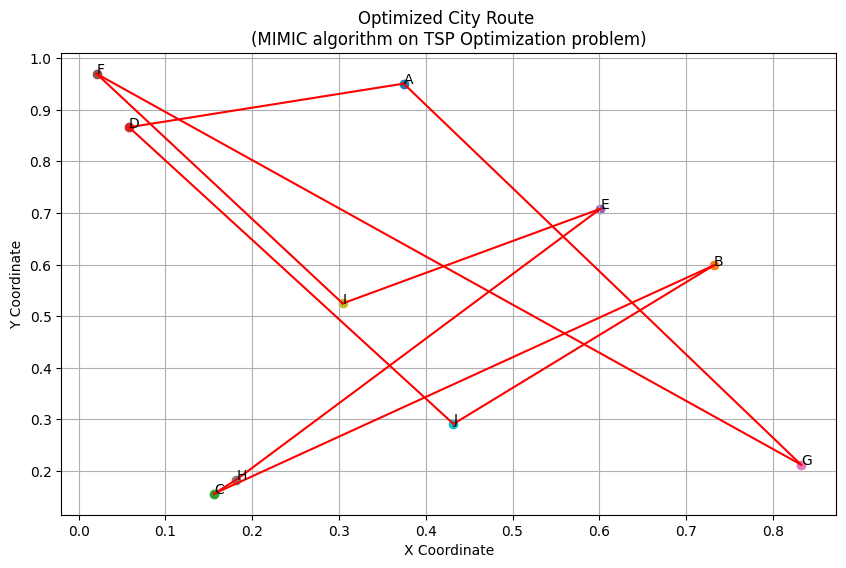

In [ ]:
# Convert the string representation of the list into an actual list of integers
best_state = ast.literal_eval(best_state)

# Plot the results in a graph showing the path
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y)
    plt.annotate(chr(65 + i), (x, y))

# Draw lines for the best state
for i in range(len(best_state)):
    start_pos = coords[best_state[i - 1]]
    end_pos = coords[best_state[i]]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'r-')

plt.title('Optimized City Route \n(MIMIC algorithm on TSP Optimization problem)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

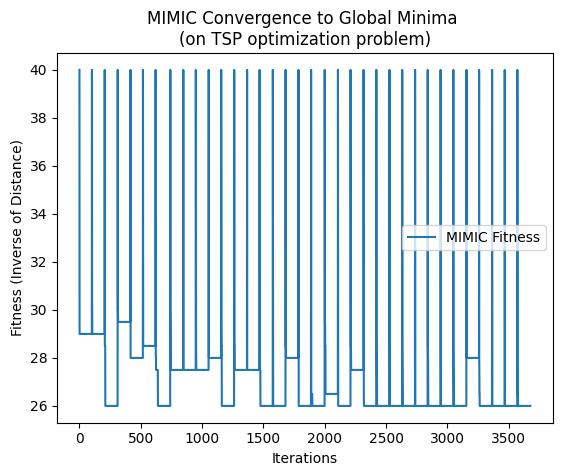

In [ ]:
# Plot the convergence to the global minima
plt.plot(mimic_tsp_curve['Fitness'], label='MIMIC Fitness')
plt.title("MIMIC Convergence to Global Minima \n(on TSP optimization problem)")
plt.xlabel("Iterations")
plt.ylabel("Fitness (Inverse of Distance)")
plt.legend()
plt.show()

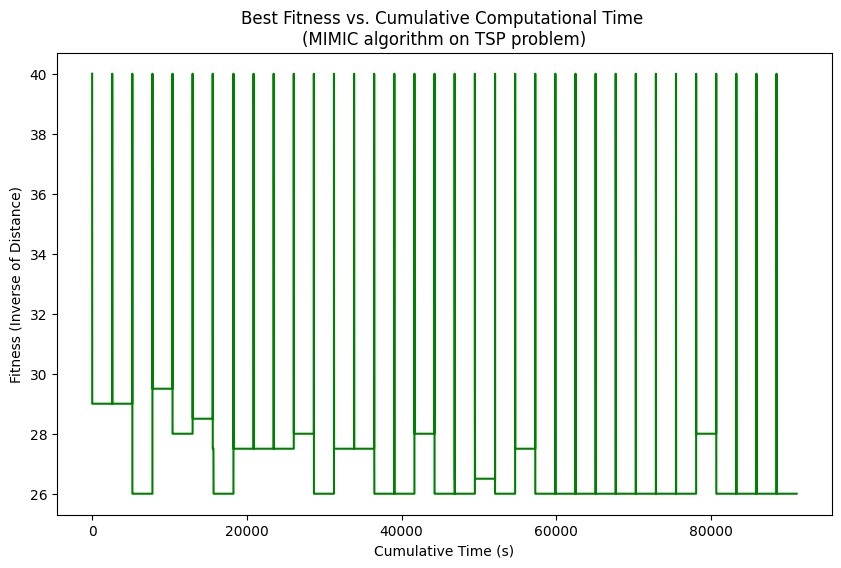

In [ ]:
# Accuracy vs. Fitness Time
# Tracking cumulative time
cumulative_time = np.cumsum(mimic_tsp_curve['Time'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_time, mimic_tsp_curve['Fitness'], color='green')
plt.title("Best Fitness vs. Cumulative Computational Time \n(MIMIC algorithm on TSP problem)")
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Fitness (Inverse of Distance)")
plt.show()

### Solving the Four Peaks Problem Using the Genetic algorithm

In [ ]:
problem_length = 60
#init_state = np.random.randint(2, size = problem_length)
fitness = FourPeaks(t_pct=0.1)
problem_length = 100  # You can adjust this value as needed
problem_fp = DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True)

#fitness = mlrose_hiive.FourPeaks(t_pct=0.1)


In [ ]:
# create a runner class and solve the problem using the Genetic algorithm
ga_fp_runner = GARunner(problem=problem_fp,
                                  experiment_name="GA_Four_Peaks",
                                  output_directory=None,  # Specify your output directory here
                                  seed=9,
                                  iteration_list=2 ** np.arange(11),
                                  max_attempts=10,
                                  population_sizes=[200],
                                  mutation_rates=[0.1])

ga_fp_stats, ga_fp_curve = ga_fp_runner.run()

In [ ]:
# Disply the best state
best_state = ga_fp_stats.loc[ga_fp_stats['Fitness'].idxmax(), 'State']
print("Best State:\n", best_state)

Best State:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Display the best fitness
best_fitness = ga_fp_stats['Fitness'].max()
print("Best Fitness:", best_fitness)

Best Fitness: 124.0


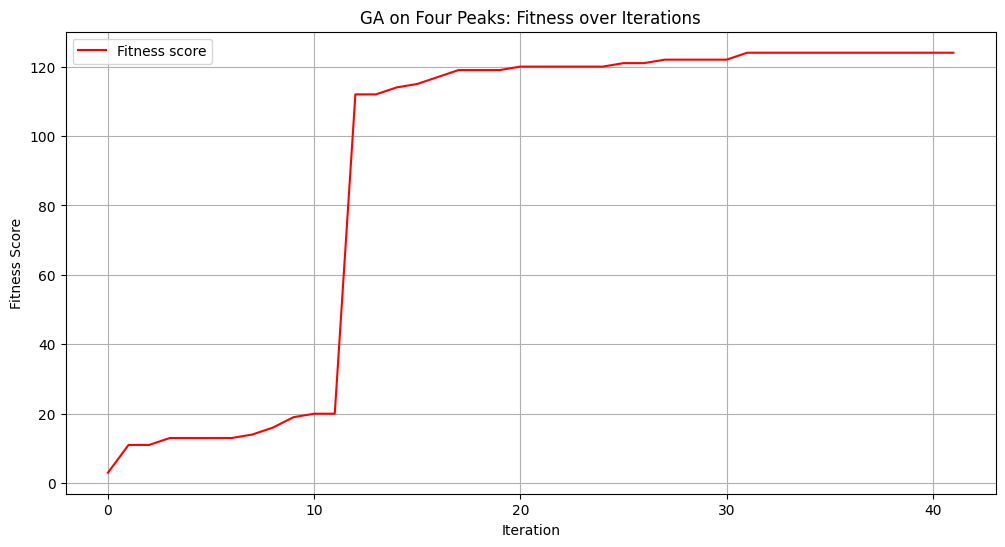

In [ ]:
# Plot the results in a graph
# Plot 1: Fitness Scores over Iterations
plt.figure(figsize=(12, 6))
plt.plot(ga_fp_curve['Iteration'], ga_fp_curve['Fitness'], label='Fitness score', color='r')
plt.title('GA on Four Peaks: Fitness over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Fitness Score')
plt.legend()
plt.grid(True)
plt.show()

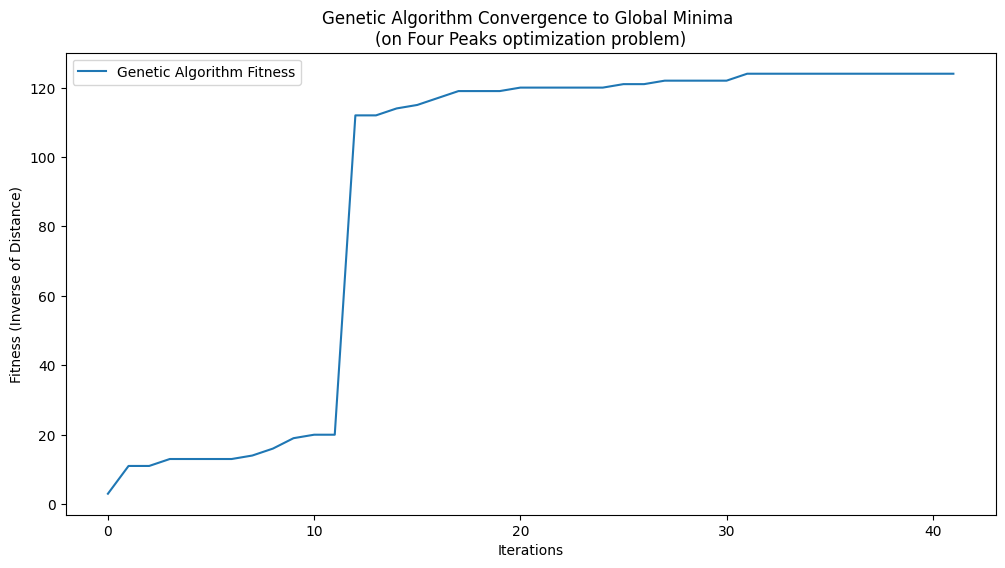

In [ ]:
# Plot the convergence to the global minima
plt.figure(figsize=(12, 6))
plt.plot(ga_fp_curve['Fitness'], label='Genetic Algorithm Fitness')
plt.title("Genetic Algorithm Convergence to Global Minima \n(on Four Peaks optimization problem)")
plt.xlabel("Iterations")
plt.ylabel("Fitness (Inverse of Distance)")
plt.legend()
plt.show()

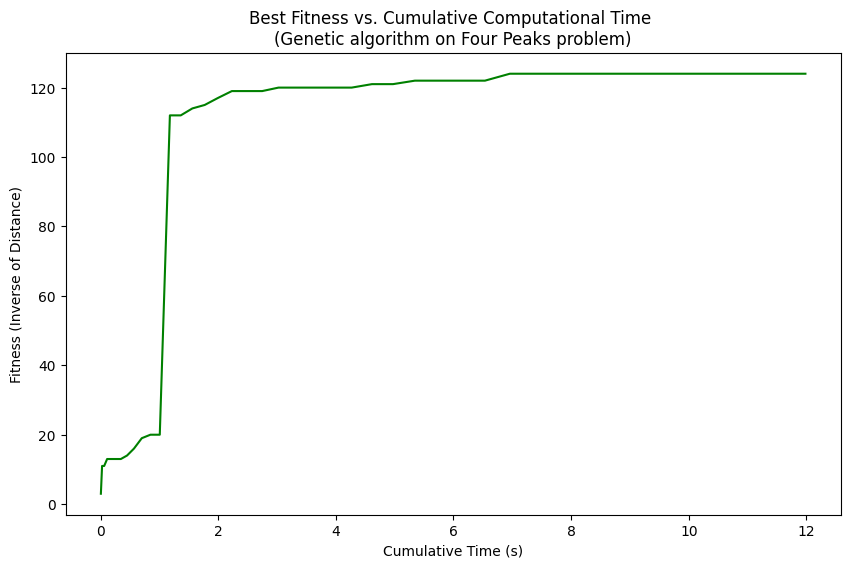

In [ ]:
# Accuracy vs. Fitness Time
# Tracking cumulative time
cumulative_time = np.cumsum(ga_fp_curve['Time'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_time, ga_fp_curve['Fitness'], color='green')
plt.title("Best Fitness vs. Cumulative Computational Time \n(Genetic algorithm on Four Peaks problem)")
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Fitness (Inverse of Distance)")
plt.show()

### Solving the Four Peaks Problem Using the Simulated Annealing algorithm

In [ ]:
problem_length = 60
#init_state = np.random.randint(2, size = problem_length)
fitness = FourPeaks()
problem_fp = DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True)

In [ ]:
GeomDecay_start_time = time.time()
_, GeomDecay_best_fitness, sa_fitness_curve1 = simulated_annealing(problem_fp, schedule = GeomDecay(), random_state = 10, max_iters = iterations, curve = True)
GeomDecay_total_time = time.time() - GeomDecay_start_time
print("Geometric Decay")
print("Best value for fitness: "+str(GeomDecay_best_fitness)+" Total time: "+str(GeomDecay_total_time))

ExpDecay_start_time = time.time()
_, ExpDecay_best_fitness, sa_fitness_curve2 = simulated_annealing(problem_fp, schedule = ExpDecay(),  random_state = 10, max_iters = iterations, curve = True)
ExpDecay_total_time = time.time() - ExpDecay_start_time
print("Exponential Decay")
print("Best value for fitness: "+str(ExpDecay_best_fitness)+" Total time: "+str(ExpDecay_total_time))

ArithDecay_start_time = time.time()
_, ArithDecay_best_fitness, sa_fitness_curve3 = simulated_annealing(problem_fp, schedule = ArithDecay(), random_state = 10, max_iters = iterations, curve = True)
ArithDecay_total_time = time.time() - ArithDecay_start_time
print("Arithmetic Decay")
print("Best value for fitness: "+str(ArithDecay_best_fitness)+" Total time: "+str(ArithDecay_total_time))


Geometric Decay
Best value for fitness: 98.0 Total time: 0.024172544479370117
Exponential Decay
Best value for fitness: 98.0 Total time: 0.025789737701416016
Arithmetic Decay
Best value for fitness: 88.0 Total time: 0.029623746871948242


<function matplotlib.pyplot.close(fig=None)>

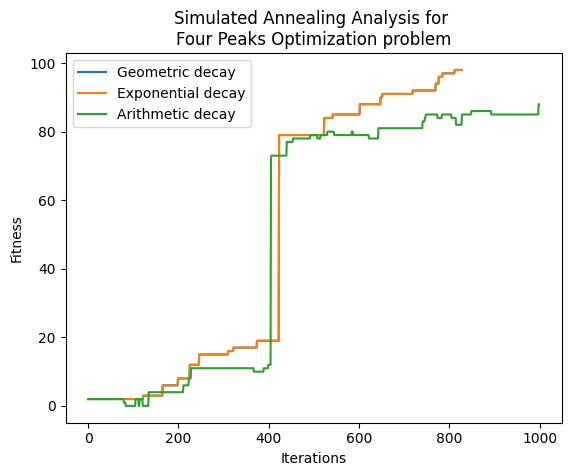

In [ ]:
plt.figure()
plt.plot(sa_fitness_curve1[:,0], label = 'Geometric decay')
plt.plot(sa_fitness_curve2[:,0], label = 'Exponential decay')
plt.plot(sa_fitness_curve3[:,0], label = 'Arithmetic decay')
plt.title('Simulated Annealing Analysis for \nFour Peaks Optimization problem')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.close

In [ ]:
# create a runner class and solve the problem
sa_fp_runner = SARunner(problem=problem_fp,
              experiment_name='four_peak_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=9,
              iteration_list=2 ** np.arange(11),
              max_attempts=95,
              #temperature_list=[0.1, 0.5, 2.0, 3.0, 4.5, 6.0],
              temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
              decay_list=[mlrose_hiive.GeomDecay,mlrose_hiive.ArithDecay,mlrose_hiive.ExpDecay])

# the two data frames will contain the results
#fp_sa_run_stats, fp_sa_run_curves = sa.run()

# Execute the simulation annealing algorithm
sa_fp_stats, sa_fp_curve = sa_fp_runner.run()

In [ ]:
# Disply the best state
#best_state = sa_fp_stats.loc[sa_fp_stats['Fitness'].idxmax()]['State']
#print("Best state:\n", best_state)

best_fitness = sa_fp_curve['Fitness'].max()
#best_sa_fp_state = sa_fp_curve[sa_fp_curve['Fitness'] == best_fitness]
#print("Best state:\n", best_sa_fp_state)

best_state_index = sa_fp_stats['Fitness'].idxmax()
best_state = sa_fp_stats.loc[best_state_index, 'State']
print('Best state:', best_state)

Best state: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Display the best fitness
best_fitness = sa_fp_stats['Fitness'].max()
print("Best fitness:", best_fitness)

Best fitness: 92.0


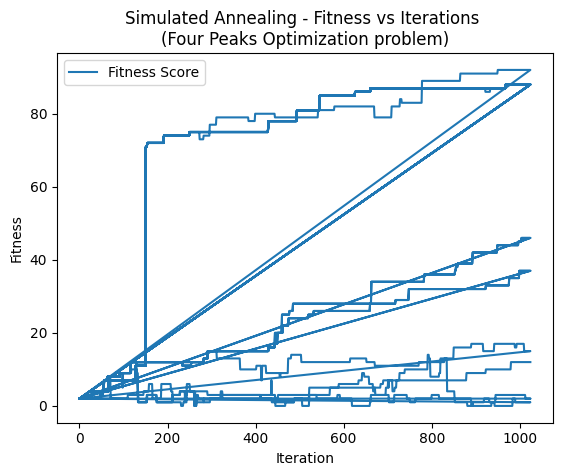

In [ ]:
# Plot the results in a graph - Fitness vs Iterations
plt.figure()
plt.plot(sa_fp_curve['Iteration'], sa_fp_curve['Fitness'], label='Fitness Score')
plt.title('Simulated Annealing - Fitness vs Iterations \n(Four Peaks Optimization problem)')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.show()

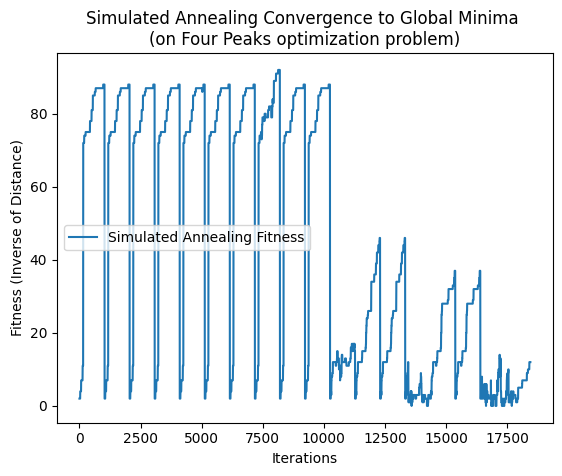

In [ ]:
# Plot the convergence to the global minima
plt.plot(sa_fp_curve['Fitness'], label='Simulated Annealing Fitness')
plt.title("Simulated Annealing Convergence to Global Minima \n(on Four Peaks optimization problem)")
plt.xlabel("Iterations")
plt.ylabel("Fitness (Inverse of Distance)")
plt.legend()
plt.show()

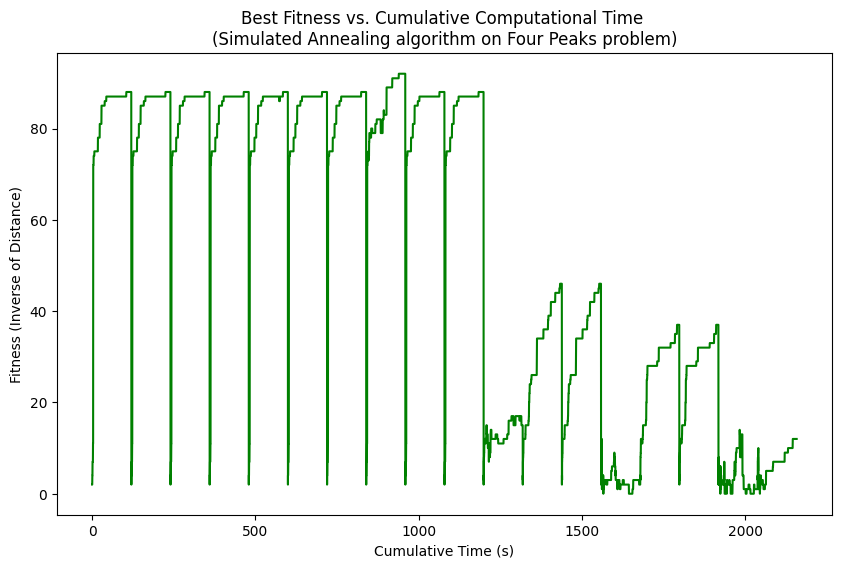

In [ ]:
# Accuracy vs. Fitness Time
# Tracking cumulative time
cumulative_time = np.cumsum(sa_fp_curve['Time'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_time, sa_fp_curve['Fitness'], color='green')
plt.title("Best Fitness vs. Cumulative Computational Time \n(Simulated Annealing algorithm on Four Peaks problem)")
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Fitness (Inverse of Distance)")
plt.show()

### Solving the Four Peaks Problem Using the Randomized Hill Climbing algorithm

In [ ]:
problem_length = 60
fitness = FourPeaks(t_pct=0.1)
problem_length = 100  # You can adjust this value as needed
problem_fp = DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True)

In [ ]:
# create a runner class and solve the problem
rhc_fp_runner = RHCRunner(problem=problem_fp,
                   experiment_name="RHC_Four_Peaks",
                   output_directory=None,  # Specify your output directory here
                   seed=9,
                   iteration_list=2 ** np.arange(8),
                   max_attempts=500,
                   restart_list=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Run the RHC algorithm
rhc_fp_stats, rhc_fp_curve = rhc_fp_runner.run()

In [ ]:
# Display the best state
best_state = rhc_fp_stats.loc[rhc_fp_stats['Fitness'].idxmax()]['State']
print("Best State:", best_state)

Best State: [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Display the best fitness
best_fitness = rhc_fp_stats['Fitness'].max()
print("Best Fitness:", best_fitness)

Best Fitness: 16.0


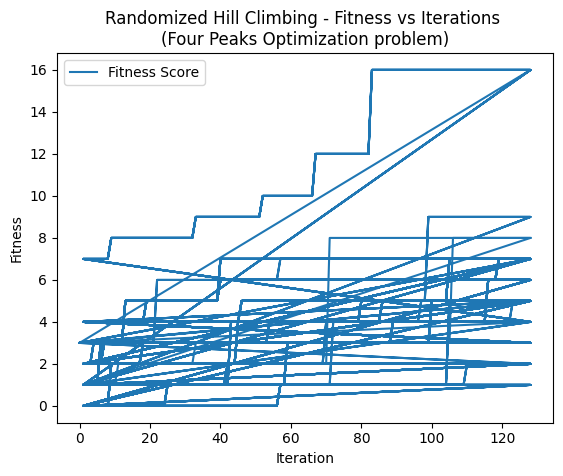

In [ ]:
# Plot the results in a graph - Fitness vs Iterations
plt.figure()
plt.plot(rhc_fp_curve['Iteration'], rhc_fp_curve['Fitness'], label='Fitness Score')
plt.title('Randomized Hill Climbing - Fitness vs Iterations \n(Four Peaks Optimization problem)')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.show()

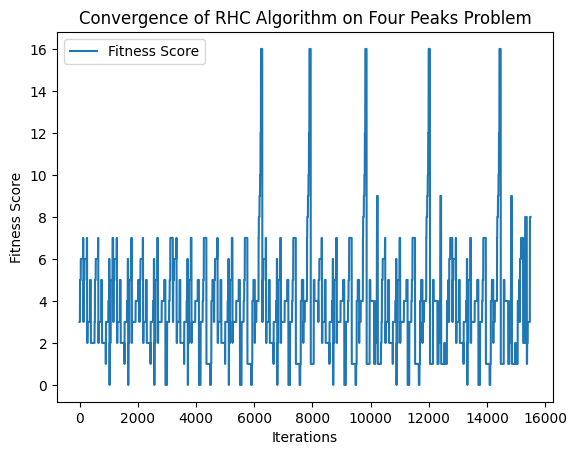

In [ ]:
# Plot the convergence of the RHC algorithm
plt.figure()
plt.plot(rhc_fp_curve['Fitness'], label='Fitness Score')
plt.title('Convergence of RHC Algorithm on Four Peaks Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness Score')
plt.legend()
plt.show()


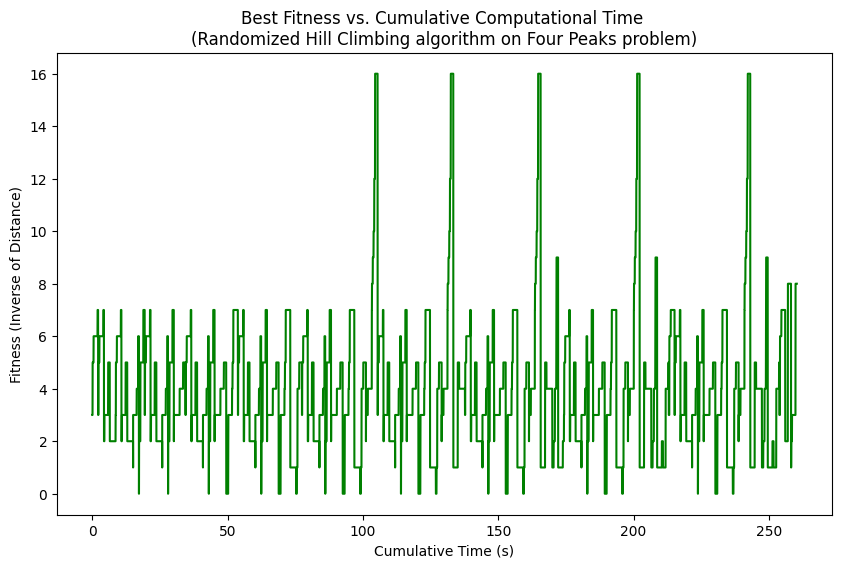

In [ ]:
# Accuracy vs. Fitness Time
# Tracking cumulative time
cumulative_time = np.cumsum(rhc_fp_curve['Time'])
plt.figure(figsize=(10, 6))
plt.plot(cumulative_time, rhc_fp_curve['Fitness'], color='green')
plt.title("Best Fitness vs. Cumulative Computational Time \n(Randomized Hill Climbing algorithm on Four Peaks problem)")
plt.xlabel("Cumulative Time (s)")
plt.ylabel("Fitness (Inverse of Distance)")
plt.show()

### Solving the Four Peaks Problem Using the MIMIC algorithm

In [ ]:
problem_length = 60
fitness = FourPeaks(t_pct=0.1)
problem_length = 100  # You can adjust this value as needed
problem_fp = DiscreteOpt(length = problem_length, fitness_fn = fitness, maximize = True)

In [ ]:
# Create a runner class and solve the problem using MIMIC

mimic_fp_runner = MIMICRunner(problem=problem_fp,
                           experiment_name="Four_Peaks_MIMIC",
                           output_directory=None,
                           seed=9,
                           iteration_list=2 ** np.arange(12),
                           max_attempts=100,
                           # population_sizes=[200, 300, 400, 500, 600, 700, 800, 900],
                           population_sizes=[200, 300, 400, 500, 600, 700, 800],
                           keep_percent_list=[0.1, 0.2, 0.3, 0.4, 0.5],
                           use_fast_mimic=True)

# Run the MIMIC algorithm
mimic_fp_stats, mimic_fp_curve = mimic_fp_runner.run()

In [ ]:
# Display the best state
best_state = mimic_fp_stats.loc[mimic_fp_stats['Fitness'].idxmax()]['State']
print(f"Best State:\n{best_state}")

Best State:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# Display the best fitness
best_fitness = mimic_fp_stats['Fitness'].max()
print(f"Best Fitness: {best_fitness}")

Best Fitness: 149.0


### Analysis of the Four Peaks Optimization problem and the algorithms

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import time
# #from deap import algorithms

# # Initialize lists to store fitness and time values
# fitness = {'sa': [], 'rhc': [], 'ga': [], 'mimic': []}
# times = {'sa': [], 'rhc': [], 'ga': [], 'mimic': []}

# problem_size = range(10, 200, 10)

# # Loop through each problem size
# for size in problem_size:
#     fitness_obj = FourPeaks()
#     problem = DiscreteOpt(length=size, fitness_fn=fitness_obj, maximize=True)

#     algorithms = {
#         'sa': lambda: simulated_annealing(problem=problem_fp, schedule=ArithDecay(), random_state=2, max_attempts=100, max_iters=1024, curve=True),
#         'rhc': lambda: random_hill_climb(problem=problem_fp, max_iters=1024, random_state=2, restarts=8, curve=True),
#         'ga': lambda: genetic_alg(problem=problem_fp, pop_size=900, mutation_prob=0.15, max_iters=1024, random_state=2, curve=True),
#         'mimic': lambda: mimic(problem=problem_fp, pop_size=800, keep_pct=0.3, random_state=2, max_iters=1024, curve=True, fast_mode=True)
#     }

#     for algo_name, algo_func in algorithms.items():
#         start_time = time.time()
#         _, best_fitness, _ = algo_func()
#         end_time = time.time()

#         fitness[algo_name].append(best_fitness)
#         times[algo_name].append(end_time - start_time)

# # Convert fitness and time lists to numpy arrays for plotting
# for key in fitness:
#     fitness[key] = np.array(fitness[key])
#     times[key] = np.array(times[key])

# # Plot Fitness vs. Problem Size
# plt.figure()
# for key, label in zip(fitness, ['Simulated Annealing', 'Randomized Hill Climb', 'Genetic Algorithm', 'MIMIC']):
#     plt.plot(problem_size, fitness[key], label=label)
# plt.title('Fitness vs. Problem Size \nFour Peaks Optimization Problem')
# plt.xlabel('Problem Size')
# plt.ylabel('Fitness')
# plt.legend()
# plt.close()

# # Plot Time vs. Problem Size
# plt.figure()
# for key, label in zip(times, ['Simulated Annealing', 'Randomized Hill Climb', 'Genetic Algorithm', 'MIMIC']):
#     plt.plot(problem_size, times[key], label=label)
# plt.title('Time vs. Problem Size (Four Peaks)')
# plt.xlabel('Problem Size')
# plt.ylabel('Fitting Time (s)')
# plt.legend()
# plt.close()

# # Plot Fitness vs. Iterations for a fixed problem length
# problem_length = 60
# fitness_obj = FourPeaks()
# problem = DiscreteOpt(length=problem_length, fitness_fn=fitness_obj, maximize=True)
# curves = {}

# plt.figure()
# for algo_name, algo_func in algorithms.items():
#     start_time = time.time()
#     _, _, curve = algo_func()
#     curves[algo_name] = curve[:, 0]
#     plt.plot(curve[:, 0], label=algo_name.upper())
# plt.title('Fitness vs. Iterations \nFour Peaks Optimization Problem')
# plt.xlabel('Iterations')
# plt.ylabel('Fitness')
# plt.legend()
# plt.close()

# # Plot Evaluation vs. Iterations
# plt.figure()
# for key in curves:
#     plt.plot(curves[key], label=key.upper())
# plt.title('Evaluation vs. Iterations \nFour Peaks Optimization Problem')
# plt.xlabel('Iterations')
# plt.ylabel('Fitness Evaluation')
# plt.legend()
# plt.close()

# # Summary of times for each algorithm
# time_summary = [times[key][-1] for key in times]
# algorithms = ['SA', 'RHC', 'GA', 'MIMIC']
# df = pd.DataFrame(time_summary, index=algorithms, columns=['Time'])
# print(df)

# ax = df.plot.bar(rot=0, title='Wall Clock Time \nFour Peaks Optimization Problem')

In [ ]:
fitness_simulated_annealing = []
fitness_random_hill_climb = []
fitness_genetic_algorithm = []
fitness_mimic = []

time_simulated_annealing = []
time_random_hill_climb = []
time_genetic_algorithm = []
time_mimic = []


problem_size = range(10,200,10)
for size in problem_size:
    fitness = FourPeaks()
    problem = DiscreteOpt(length = size, fitness_fn = fitness, maximize = True)
    #init_state = np.random.randint(2, size = size)
    start = time.time()
    _, best_fitness_sa, _ = simulated_annealing(problem, schedule = ArithDecay(), random_state = 2, max_attempts=100, max_iters = 1024, curve = True)
    end = time.time()
    sa_time = end - start

    start = time.time()
    _, best_fitness_rhc, _ = random_hill_climb(problem, max_iters = 1024, random_state = 2, restarts = 8, curve = True)
    end = time.time()
    rhc_time = end - start

    start = time.time()
    _, best_fitness_ga, _ = genetic_alg(problem, pop_size = 900, mutation_prob = 0.15, max_iters = 1024, random_state = 2, curve = True)
    end = time.time()
    ga_time = end - start

    problem.set_mimic_fast_mode(True)
    start = time.time()
    _, best_fitness_mimic, _ = mimic(problem, pop_size = 800, keep_pct = 0.3, random_state = 2, max_iters = 1024, curve = True)
    end = time.time()
    mimic_time = end - start

    fitness_simulated_annealing.append(best_fitness_sa)
    fitness_random_hill_climb.append(best_fitness_rhc)
    fitness_genetic_algorithm.append(best_fitness_ga)
    fitness_mimic.append(best_fitness_mimic)

    time_simulated_annealing.append(sa_time)
    time_random_hill_climb.append(rhc_time)
    time_genetic_algorithm.append(ga_time)
    time_mimic.append(mimic_time)


fitness_simulated_annealing = np.array(fitness_simulated_annealing)
fitness_random_hill_climb = np.array(fitness_random_hill_climb)
fitness_genetic_algorithm = np.array(fitness_genetic_algorithm)
fitness_mimic = np.array(fitness_mimic)

### Analysis of the Eight Queens Optimization problem and the algorithms

In [ ]:
# Initialize lists to store fitness and time values
fitness = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}
times = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}

problem_size = range(10, 210, 10)

# Loop through each problem size
for size in problem_size:
    fitness_obj = Queens()
    problem = DiscreteOpt(length=size, fitness_fn=fitness_obj, maximize=True)

    algorithms = {
        'ga': lambda: genetic_alg(problem=problem, pop_size=800, mutation_prob=0.15, max_iters=1024, random_state=2, curve=True),
        'mimic': lambda: mimic(problem=problem, pop_size=800, keep_pct=0.3, random_state=2, max_iters=1024, curve=True),  # Removed the 'fast_mode' argument
        'rhc': lambda: random_hill_climb(problem=problem, max_iters=1024, random_state=2, restarts=8, curve=True),
        'sa': lambda: simulated_annealing(problem=problem, schedule=ArithDecay(), random_state=2, max_attempts=100, max_iters=1024, curve=True)
    }

    for algo_name, algo_func in algorithms.items():
        start_time = time.time()
        _, best_fitness, _ = algo_func()
        end_time = time.time()

        fitness[algo_name].append(best_fitness)
        times[algo_name].append(end_time - start_time)

# Convert fitness and time lists to numpy arrays for plotting
for key in fitness:
    fitness[key] = np.array(fitness[key])
    times[key] = np.array(times[key])

# Plot Fitness vs. Problem Size
plt.figure()
for key, label in zip(fitness, ['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climb', 'Simulated Annealing']):
    plt.plot(problem_size, fitness[key], label=label)
plt.title('Fitness vs. Problem Size for \nEight Queens Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Time vs. Problem Size
plt.figure()
for key, label in zip(times, ['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climb', 'Simulated Annealing']):
    plt.plot(problem_size, times[key], label=label)
plt.title('Time vs. Problem Size for \nEight Queens Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Fitting Time (s)')
plt.legend()
plt.show()

# Plot Fitness vs. Iterations for a fixed problem length
problem_length = 60
fitness_obj = Queens()
problem = DiscreteOpt(length=problem_length, fitness_fn=fitness_obj, maximize=True)
curves = {}

plt.figure()
for algo_name, algo_func in algorithms.items():
    start_time = time.time()
    _, _, curve = algo_func()
    curves[algo_name] = curve[:, 0]
    plt.plot(curve[:, 0], label=algo_name.upper())
plt.title('Fitness vs. Iterations \nEight Queens Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Evaluation vs. Iterations
plt.figure()
for key in curves:
    plt.plot(curves[key], label=key.upper())
plt.title('Evaluation vs. Iterations for \nEight Queens Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness Evaluation')
plt.legend()
plt.show()

# Summary of times for each algorithm
time_summary = [times[key][-1] for key in times]
algorithms = ['GA', 'MIMIC', 'RHC', 'SA']
df = pd.DataFrame(time_summary, index=algorithms, columns=['Time'])
print(df)

ax = df.plot.bar(rot=0, title='Wall Clock Time for \nEight Queens Optimization Problem')
plt.show()

### Analysis of the Travelling Salesperson Optimization problem and the algorithms

In [ ]:
# Initialize lists to store fitness and time values
fitness = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}
times = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}

problem_size = range(10, 210, 10)

# Loop through each problem size
for size in problem_size:
    fitness_obj = TravellingSales()
    problem = DiscreteOpt(length=size, fitness_fn=fitness_obj, maximize=True)

    algorithms = {
        'ga': lambda: genetic_alg(problem=problem, pop_size=800, mutation_prob=0.15, max_iters=1024, random_state=2, curve=True),
        'mimic': lambda: mimic(problem=problem, pop_size=800, keep_pct=0.3, random_state=2, max_iters=1024, curve=True),  # Removed the 'fast_mode' argument
        'rhc': lambda: random_hill_climb(problem=problem, max_iters=1024, random_state=2, restarts=8, curve=True),
        'sa': lambda: simulated_annealing(problem=problem, schedule=ArithDecay(), random_state=2, max_attempts=100, max_iters=1024, curve=True)
    }

    for algo_name, algo_func in algorithms.items():
        start_time = time.time()
        _, best_fitness, _ = algo_func()
        end_time = time.time()

        fitness[algo_name].append(best_fitness)
        times[algo_name].append(end_time - start_time)

# Convert fitness and time lists to numpy arrays for plotting
for key in fitness:
    fitness[key] = np.array(fitness[key])
    times[key] = np.array(times[key])

# Plot Fitness vs. Problem Size
plt.figure()
for key, label in zip(fitness, ['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climb', 'Simulated Annealing']):
    plt.plot(problem_size, fitness[key], label=label)
plt.title('Fitness vs. Problem Size for \nTravelling Salesperson Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Time vs. Problem Size
plt.figure()
for key, label in zip(times, ['Genetic Algorithm', 'MIMIC', 'Randomized Hill Climb', 'Simulated Annealing']):
    plt.plot(problem_size, times[key], label=label)
plt.title('Time vs. Problem Size for \nTravelling Salesperson Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Fitting Time (s)')
plt.legend()
plt.show()

# Plot Fitness vs. Iterations for a fixed problem length
problem_length = 60
fitness_obj = TravellingSales()
problem = DiscreteOpt(length=problem_length, fitness_fn=fitness_obj, maximize=True)
curves = {}

plt.figure()
for algo_name, algo_func in algorithms.items():
    start_time = time.time()
    _, _, curve = algo_func()
    curves[algo_name] = curve[:, 0]
    plt.plot(curve[:, 0], label=algo_name.upper())
plt.title('Fitness vs. Iterations \nTravelling Salesperson Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Evaluation vs. Iterations
plt.figure()
for key in curves:
    plt.plot(curves[key], label=key.upper())
plt.title('Evaluation vs. Iterations for \nTravelling Salesperson Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness Evaluation')
plt.legend()
plt.show()

# Summary of times for each algorithm
time_summary = [times[key][-1] for key in times]
algorithms = ['GA', 'MIMIC', 'RHC', 'SA']
df = pd.DataFrame(time_summary, index=algorithms, columns=['Time'])
print(df)

ax = df.plot.bar(rot=0, title='Wall Clock Time for \nTravelling Salesperson Optimization Problem')
plt.show()